# Importar librerias

In [1]:
# Instalamos las librerías necesarias: numpy y pandas poder importarlas
!pip install numpy pandas

# Importamos todas las librerías que vamos a utilizar en el análisis
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# 1. EDA Datos campaña de Marketing - Archivo Bank-details

## 1.1 Importar los datos del Archivo Bank-additional y crear un data frame

In [2]:
# Definimos la ruta del archivo CSV
csv_path = r"C:\Users\nicol\OneDrive - Universidad San Francisco de Quito\Escritorio\THE POWER - BOOTCAMP\DATA ANALYTICS\PROYECTOS - ENTREGAS\4. PYTHON_EDA\Manejo_de_Datos\DatosBruto\bank-additional.csv"

# Importamos el archivo CSV y creamos el DataFrame
Bank_registros = pd.read_csv(csv_path, sep=',', index_col=0)  # Usamos sep=',' porque el separador suele ser siempre una coma
# Mostramos las primeras filas del DataFrame para verificar la importación
Bank_registros.head()

,age,job,marital,education,default,housing,loan,contact,duration,campaign,...,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,latitude,longitude,id_
0,NaN,housemaid,MARRIED,basic.4y,0.0,0.0,0.0,telephone,261,1,...,1.1,"93,994","-36,4","4,857",5191,no,2-agosto-2019,41.495,-71.233,089b39d8-e4d0-461b-87d4-814d71e0e079
1,57.0,services,MARRIED,high.school,NaN,0.0,0.0,telephone,149,1,...,1.1,"93,994","-36,4",NaN,5191,no,14-septiembre-2016,34.601,-83.923,e9d37224-cb6f-4942-98d7-46672963d097
2,37.0,services,MARRIED,high.school,0.0,1.0,0.0,telephone,226,1,...,1.1,"93,994","-36,4","4,857",5191,no,15-febrero-2019,34.939,-94.847,3f9f49b5-e410-4948-bf6e-f9244f04918b
3,40.0,admin.,MARRIED,basic.6y,0.0,0.0,0.0,telephone,151,1,...,1.1,"93,994","-36,4",NaN,5191,no,29-noviembre-2015,49.041,-70.308,9991fafb-4447-451a-8be2-b0df6098d13e
4,56.0,services,MARRIED,high.school,0.0,0.0,1.0,telephone,307,1,...,1.1,"93,994","-36,4",NaN,5191,no,29-enero-2017,38.033,-104.463,eca60b76-70b6-4077-80ba-bc52e8ebb0eb


## 1.2 Exploración inicial de los datos y sus caracteríaticas

In [3]:
# 1. Contamos cuantas filas y columnas tiene el DataFrame en total para tener una mejor idea de los datos y su tamaño usando shape
print("Cantidad de filas y columnas:")
print(Bank_registros.shape)

Cantidad de filas y columnas:
(43000, 23)


In [4]:
# 2. Verificamos los tipos de datos de cada columna usando dtypes
print("\nTipos de datos de cada columna:")
print(Bank_registros.dtypes)


Tipos de datos de cada columna:
age               float64
job                object
marital            object
education          object
default           float64
housing           float64
loan              float64
contact            object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx     object
cons.conf.idx      object
euribor3m          object
nr.employed        object
y                  object
date               object
latitude          float64
longitude         float64
id_                object
dtype: object


In [5]:
# 3. Vemos las principales Estadísticas descriptivas para columnas numéricas usando describe()
print("\nEstadísticas descriptivas de columnas numéricas:")
Bank_registros.describe()


Estadísticas descriptivas de columnas numéricas:


,age,default,housing,loan,duration,campaign,pdays,previous,emp.var.rate,latitude,longitude
count,37880.000000,34019.000000,41974.000000,41974.000000,43000.000000,43000.000000,43000.000000,43000.000000,43000.000000,43000.000000,43000.000000
mean,39.977112,0.000088,0.535998,0.155620,257.739279,2.567233,962.330953,0.174023,0.077128,36.856697,-95.939067
std,10.437957,0.009390,0.498708,0.362499,258.666033,2.772294,187.260394,0.497366,1.573898,7.225948,16.752282
min,17.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,24.396000,-124.997000
25%,32.000000,0.000000,0.000000,0.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,30.614750,-110.494250
50%,38.000000,0.000000,1.000000,0.000000,179.000000,2.000000,999.000000,0.000000,1.100000,36.761000,-95.899500
75%,47.000000,0.000000,1.000000,0.000000,319.000000,3.000000,999.000000,0.000000,1.400000,43.113250,-81.427750
max,98.000000,1.000000,1.000000,1.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,49.384000,-66.937000


In [6]:
# 4. Ahora vemos las estadísticas descriptivas para columnas categóricas/objetos
print("\nEstadísticas descriptivas de columnas categóricas:")
Bank_registros.describe(include=['object'])


Estadísticas descriptivas de columnas categóricas:


,job,marital,education,contact,poutcome,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,id_
count,42655,42915,41193,43000,43000,42529,43000,33744,43000,43000,42752,43000
unique,11,3,7,2,3,26,26,309,11,2,1825,43000
top,admin.,MARRIED,university.degree,cellular,NONEXISTENT,"93,994","-36,4","4,857","5228,1",no,28-febrero-2018,089b39d8-e4d0-461b-87d4-814d71e0e079
freq,10873,25999,12722,27396,37103,7938,8020,2287,16980,38156,95,1


In [7]:
# 5. Verificamos los valores nulos por columna aplicando una sumatoria a isnull()
print("\nCantidad de valores nulos por columna:")
Bank_registros.isnull().sum()


Cantidad de valores nulos por columna:


age               5120
job                345
marital             85
education         1807
default           8981
housing           1026
loan              1026
contact              0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx     471
cons.conf.idx        0
euribor3m         9256
nr.employed          0
y                    0
date               248
latitude             0
longitude            0
id_                  0
dtype: int64

In [8]:
# 6. Aplicamos una técnica más avanzada para consolidar en una tabla la cuenta de nulls también de los valores que sean 0 o 0.0 en cada columna.

# Queremos contar por cada columna:
#  - cuántos valores son cero (0 o 0.0), intentando cubrir columnas numéricas y columnas tipo objeto con "0", "0.0" o representaciones con coma
#  - cuántos valores nulos (NaN / NaT)

# Para tener un resumen completo separado, creamos un DataFrame de resumen con conteos y porcentajes.

# Número total de filas (para calcular porcentajes)
total_filas = len(Bank_registros)

# Creo dos diccionarios para acumular resultados
zero_counts = {}
null_counts = {}

# Iteramos sobre cada columna para contar ceros y nulos usando un bucle for
for col in Bank_registros.columns:
    ser = Bank_registros[col]
    # contar nulos directamente
    nulos = ser.isnull().sum()
    null_counts[col] = nulos

    # Inicializamos conteo de ceros
    ceros = 0

    # Si la columna es numérica, conteo directo de == 0
    if pd.api.types.is_numeric_dtype(ser):
        ceros = (ser == 0).sum()
    else:
        # Para columnas no numéricas, convertimos a string y buscamos '0'/'0.0'
        ser_str = ser.astype(str)
        mask_str_zero = ser_str.isin(['0', '0.0'])
        # Intentamos convertir a numérico (reemplazando coma por punto) y buscar ceros numéricos
        ser_num = pd.to_numeric(ser_str.str.replace(',', '.', regex=False), errors='coerce')
        mask_num_zero = ser_num.eq(0)
        # Unimos ambas máscaras para evitar contar dos veces el mismo elemento
        ceros = (mask_str_zero | mask_num_zero).sum()

    zero_counts[col] = int(ceros)

# Construimos un DataFrame con los resultados ordenado por mayor cantidad de ceros
resumen = pd.DataFrame({
    'zero_count': pd.Series(zero_counts),
    'null_count': pd.Series(null_counts)
})

# Agregamos columnas auxiliares: total y porcentajes
resumen['total_rows'] = total_filas
resumen['pct_zero'] = (resumen['zero_count'] / resumen['total_rows'] * 100).round(2)
resumen['pct_null'] = (resumen['null_count'] / resumen['total_rows'] * 100).round(2)

# Ordenamos para ver primero las columnas con más ceros
resumen = resumen.sort_values(by='zero_count', ascending=False)

# Mostramos el dataframe resumen
print("Resumen por columna: conteo de ceros y nulos (con porcentajes).")
resumen

Resumen por columna: conteo de ceros y nulos (con porcentajes).


,zero_count,null_count,total_rows,pct_zero,pct_null
previous,37103,0,43000,86.29,0.00
loan,35442,1026,43000,82.42,2.39
default,34016,8981,43000,79.11,20.89
housing,19476,1026,43000,45.29,2.39
pdays,15,0,43000,0.03,0.00
duration,4,0,43000,0.01,0.00
cons.price.idx,0,471,43000,0.00,1.10
longitude,0,0,43000,0.00,0.00
latitude,0,0,43000,0.00,0.00
date,0,248,43000,0.00,0.58


#### Vemos en la tabla anterior algunas columnas que tienen altos porcentajes de nulos o 0s que podrían ser eliminadas si no me aportan nada. Por ejemplo la columna default, la suma entre nulos y 0s el 100% de sus datos. También vemos la columna loan con aproximadamente 85% de datos no válidos.

## 1.3 Transformación y limpieza de datos

### 1.3.1 Limpieza de datos

In [9]:
# Eliminamos las columnas 'latitude', 'longitude' y 'default' del DataFrame Bank_registros
# Usamos drop() con axis=1 para indicar que son columnas y inplace=True para modificar el DataFrame original
Bank_registros.drop(['latitude', 'longitude','default'], axis=1, inplace=True)

# Verificamos que las columnas hayan sido eliminadas mostrando las primeras filas
Bank_registros.head()

,age,job,marital,education,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,id_
0,NaN,housemaid,MARRIED,basic.4y,0.0,0.0,telephone,261,1,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,857",5191,no,2-agosto-2019,089b39d8-e4d0-461b-87d4-814d71e0e079
1,57.0,services,MARRIED,high.school,0.0,0.0,telephone,149,1,999,0,NONEXISTENT,1.1,"93,994","-36,4",NaN,5191,no,14-septiembre-2016,e9d37224-cb6f-4942-98d7-46672963d097
2,37.0,services,MARRIED,high.school,1.0,0.0,telephone,226,1,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,857",5191,no,15-febrero-2019,3f9f49b5-e410-4948-bf6e-f9244f04918b
3,40.0,admin.,MARRIED,basic.6y,0.0,0.0,telephone,151,1,999,0,NONEXISTENT,1.1,"93,994","-36,4",NaN,5191,no,29-noviembre-2015,9991fafb-4447-451a-8be2-b0df6098d13e
4,56.0,services,MARRIED,high.school,0.0,1.0,telephone,307,1,999,0,NONEXISTENT,1.1,"93,994","-36,4",NaN,5191,no,29-enero-2017,eca60b76-70b6-4077-80ba-bc52e8ebb0eb


### 1.3.2 Transformacion de datos

In [10]:
# Tras verificar nuestros datos ,algunos valores marcados como no numéricos deben ser convertidos a float
cols_to_float = ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

# Filtramos solo las columnas que existen realmente en el DataFrame
cols_presentes = [c for c in cols_to_float if c in Bank_registros.columns]

# Definimos una función de conversión a float por si la queremso usar en un futuro
def _to_float_series(ser):
    """
    Convierte una Series a float manejando:
    - separador decimal con coma (',' -> '.')
    - espacios y caracteres de agrupación simples
    - valores no numéricos se convierten a NaN (errors='coerce')
    """
    # Convertir a string, limpiar espacios, cambiar coma decimal por punto
    s = ser.astype(str).str.strip().replace('nan', pd.NA)  # mantenemos NA como pd.NA para detectar nulos
    # Reemplazamos coma decimal por punto
    s = s.astype(str).str.replace(',', '.', regex=False)
    # Eliminamos espacios interiores (posibles separadores de miles)
    s = s.str.replace(' ', '', regex=False)
    # Intentamos convertir a numérico; los que no se puedan convertir pasan a NaN
    return pd.to_numeric(s, errors='coerce')

# Aplicar un bucle for para la conversión columna por columna
for col in cols_presentes:
    print(f"\n--- Procesando columna: '{col}' ---")
    # Estado antes
    print("  dtype antes:", Bank_registros[col].dtype)
    print("  Ejemplos (primeros 10, originales):")
    print(Bank_registros[col].head(10).tolist())

    # Realizar conversión
    converted = _to_float_series(Bank_registros[col])
    # Reemplazar la columna original por la convertida (float)
    Bank_registros[col] = converted.astype('float64')

    # Estado después
    n_total = len(Bank_registros)
    n_null_after = Bank_registros[col].isna().sum()
    n_converted = n_total - n_null_after
    print(f"  dtype después: {Bank_registros[col].dtype}")
    print(f"  Conversión exitosa en {n_converted}/{n_total} filas; {n_null_after} filas quedaron como NaN")

# Para verificar que se ha aplicado correctamente, mostramos tipos y primeras filas de las columnas convertidas
print("\nResumen de dtypes después de la conversión:")
print(Bank_registros[cols_presentes].dtypes)
print("\nPreview (primeras 5 filas) de las columnas convertidas:")
display(Bank_registros[cols_presentes].head())


--- Procesando columna: 'emp.var.rate' ---
  dtype antes: float64
  Ejemplos (primeros 10, originales):
[1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1]
  dtype después: float64
  Conversión exitosa en 43000/43000 filas; 0 filas quedaron como NaN

--- Procesando columna: 'cons.price.idx' ---
  dtype antes: object
  Ejemplos (primeros 10, originales):
['93,994', '93,994', '93,994', '93,994', '93,994', '93,994', '93,994', '93,994', '93,994', '93,994']
  dtype después: float64
  Conversión exitosa en 42529/43000 filas; 471 filas quedaron como NaN

--- Procesando columna: 'cons.conf.idx' ---
  dtype antes: object
  Ejemplos (primeros 10, originales):
['-36,4', '-36,4', '-36,4', '-36,4', '-36,4', '-36,4', '-36,4', '-36,4', '-36,4', '-36,4']
  dtype después: float64
  Conversión exitosa en 43000/43000 filas; 0 filas quedaron como NaN

--- Procesando columna: 'euribor3m' ---
  dtype antes: object
  Ejemplos (primeros 10, originales):
['4,857', nan, '4,857', nan, nan, '4,857', '4,857', '4,8

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.1,93.994,-36.4,4.857,5191.0
1,1.1,93.994,-36.4,NaN,5191.0
2,1.1,93.994,-36.4,4.857,5191.0
3,1.1,93.994,-36.4,NaN,5191.0
4,1.1,93.994,-36.4,NaN,5191.0


In [11]:
# Para poder utilizar la fecha en análisis posteriores, convertimos la columna 'date' al tipo datetime
# Importamos para esto la librería re y datetime para manejar expresiones regulares y fechas
import re
from datetime import datetime

# Creamos una función para transformar las fechas al formato estándar YYYY-MM-DD por si la reutilizamos a futuro

def transformar_fecha(fecha_str):
    if pd.isnull(fecha_str):
        return pd.NaT
    # Creamos un diccionario para traducir meses en español a número 
    meses = {
        'enero': '01', 'febrero': '02', 'marzo': '03', 'abril': '04',
        'mayo': '05', 'junio': '06', 'julio': '07', 'agosto': '08',
        'septiembre': '09', 'octubre': '10', 'noviembre': '11', 'diciembre': '12'
    }
    # Utilizamos una expresión regular para extraer día, mes y año
    match = re.match(r'(\d{1,2})-(\w+)-(\d{4})', fecha_str.lower())
    if match:
        dia, mes, año = match.groups()
        mes_num = meses.get(mes, None)
        if mes_num:
            # Formato final: YYYY-MM-DD
            return f"{año}-{mes_num.zfill(2)}-{dia.zfill(2)}"
    return pd.NaT  # Si no se puede transformar, se asigna NaT

# Aplicamos la función a la columna 'date'
Bank_registros['date'] = Bank_registros['date'].apply(transformar_fecha)

# Convertimos la columna 'date' al tipo datetime de pandas
Bank_registros['date'] = pd.to_datetime(Bank_registros['date'], errors='coerce')

# Verificamos el resultado
print(Bank_registros['date'].head())
print(Bank_registros['date'].dtype)

0   2019-08-02
1   2016-09-14
2   2019-02-15
3   2015-11-29
4   2017-01-29
Name: date, dtype: datetime64[ns]
datetime64[ns]


**Imputacion de datos**

Despues de limpiar nuestros datos y tener una buena calidad de los mismos. Procedemso a imputar y corregir algunas cosas para sacar el máximo provecho de los mismos.

- En primer lugar, vemos que nuestra variable age que es clave en el analisis tiene un 11% de nulos, por lo que si los eliminamos perderíamos una parte considerable de nuestro dataset. Por ello la mejor opción es imputarlos, lo vamos a hacer usando su mediana pero no global, sino una mediana basada en otras variables que ya tenemos en el dataset para que el valor dea más cercano a la realidad segun el grupo al que corresponden.

Índices duplicados en el DataFrame: 1968
Índices reseteados correctamente.
Mediana global de edad: 38.0 años


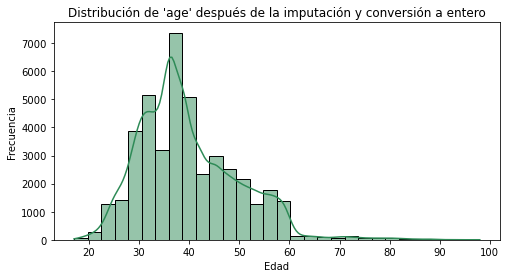

In [12]:
# Primero verificamos si hay índices duplicados en nuestro df
duplicated_idx = Bank_registros.index.duplicated().sum()
print(f"Índices duplicados en el DataFrame: {duplicated_idx}")

# Aplicamso una condición con if para si hay duplicados, resetearlos (sin eliminar filas)
if duplicated_idx > 0:
    Bank_registros = Bank_registros.reset_index(drop=True)
    print("Índices reseteados correctamente.")

# Reemplazamos las edades 0 por NaN (valores no válidos)
Bank_registros['age'] = Bank_registros['age'].replace(0, np.nan)

# Calculamos la mediana global de edad
median_age_global = Bank_registros['age'].median()
print(f"Mediana global de edad: {median_age_global:.1f} años")

# Ahora procedemos a hacer una imputación condicional por grupo 'job'
Bank_registros['age'] = Bank_registros.groupby('job')['age'].transform(
    lambda x: x.fillna(x.median())
)

# Si no quedan valores restantes que no se les aplico la imputación anterios, los imputamos con la mediana global
Bank_registros['age'] = Bank_registros['age'].fillna(median_age_global)

# Una vez imputados, convertimos la variable 'age' a entero
Bank_registros['age'] = Bank_registros['age'].astype(int)

# Verificamos la distribución final de edad usando un gráfico 
plt.figure(figsize=(8,4))
sns.histplot(Bank_registros['age'], bins=30, kde=True, color='seagreen')
plt.title("Distribución de 'age' después de la imputación y conversión a entero")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()


### 1.3.3 Creación de nuevas columnas - agrupando datos

In [13]:
# Creamos una función para agrupar las edades en rangos personalizados
def agrupar_edad(age):
    if age == 0:
        return "Edad no disponible"
    elif 1 <= age <= 25:
        return "menos de 25 años"
    elif 26 <= age <= 50:
        return "entre 25 y 50 años"
    elif 51 <= age <= 75:
        return "entre 50 y 75 años"
    else:
        return "mas de 75 años"

# Aplicamos la función a la columna 'age' y creamos la nueva columna 'rangos_edad'
Bank_registros['rangos_edad'] = Bank_registros['age'].apply(agrupar_edad)

In [14]:
# Creamos una función para convertir los segundos a minutos, para tener una nueva columna que sea más facil de manejar y para poder agrupar la duration
def convertir_a_minutos(segundos):
    return round(segundos / 60, 1) # quiero solo quedarme con un decimal de precision


# Creamos la nueva columna 'duracion_minutos' aplicando la función
Bank_registros['duracion_minutos'] = Bank_registros['duration'].apply(convertir_a_minutos)

# Creamos la función para agrupar la duración en intervalos de 15 minutos
def agrupar_duracion(minutos):
    if minutos < 5:
        return "0 a 5 minutos"
    elif minutos < 10:
        return "5 a 10 minutos"
    elif minutos < 15:
        return "10 a 15 minutos"
    elif minutos < 30:
        return "15 a 30 minutos"
    elif minutos < 30:
        return "15 a 30 minutos"
    elif minutos < 45:
        return "30 a 45 minutos"
    elif minutos < 60:
        return "45 a 60 minutos"
    elif minutos < 75:
        return "60 a 75 minutos"
    elif minutos < 90:
        return "75 a 90 minutos"
    else:
        return "mas de 90 minutos"

# Creamos la nueva columna 'grupo_duracion' aplicando la función de agrupamiento
Bank_registros['grupo_duracion'] = Bank_registros['duracion_minutos'].apply(agrupar_duracion)

In [15]:
# Creamos una función para agrupar los días desde el último contacto ('pdays') en rangos personalizados
def agrupar_ultimo_contacto(pdays):
    if pdays < 180:
        return "menos de 6 meses"
    elif pdays < 365:
        return "de 6 a 12 meses"
    elif pdays < 730:
        return "de 12 a 24 meses"
    elif pdays < 1095:
        return "de 24 a 36 meses"
    else:
        return "mas de 36 meses"

# Aplicamos la función a la columna 'pdays' y creamos la nueva columna 'ultimo_contacto'
Bank_registros['ultimo_contacto'] = Bank_registros['pdays'].apply(agrupar_ultimo_contacto)

In [16]:
# Para agrupar por año y por mes necesitamos trabajar sólo con las filas que tienen fecha válida
df_fechas = Bank_registros.dropna(subset=['date']).copy()  # eliminamos filas sin fecha (NaT)

# Crear columnas auxiliares de año y periodo año-mes para agrupar fácilmente
df_fechas['año'] = df_fechas['date'].dt.year
df_fechas['año_mes'] = df_fechas['date'].dt.to_period('M')  # formato 'YYYY-MM'

# Agrupar por año (número de llamadas por año)
llamadas_por_año = df_fechas.groupby('año').size().sort_index()
print("\nLlamadas por año:")
print(llamadas_por_año)

# Agrupar por año-mes (número de llamadas por mes en su año correspondiente)
llamadas_por_año_mes = df_fechas.groupby('año_mes').size().sort_index()
print("\nLlamadas por año-mes (periodo YYYY-MM):")
print(llamadas_por_año_mes)

# Si se quiere un conteo por mes agregando todos los años (ej. todas las llamadas de enero, febrero, ...)
llamadas_por_mes_agrupado = df_fechas.groupby(df_fechas['date'].dt.month).size().sort_index()
print("\nLlamadas por mes (agrupadas todos los años, 1=enero, 12=diciembre):")
print(llamadas_por_mes_agrupado)


Llamadas por año:
año
2015    8544
2016    8533
2017    8562
2018    8549
2019    8564
dtype: int64

Llamadas por año-mes (periodo YYYY-MM):
año_mes
2015-01    706
2015-02    709
2015-03    766
2015-04    719
2015-05    715
2015-06    700
2015-07    713
2015-08    674
2015-09    713
2015-10    712
2015-11    701
2015-12    716
2016-01    711
2016-02    701
2016-03    726
2016-04    696
2016-05    692
2016-06    734
2016-07    699
2016-08    706
2016-09    727
2016-10    735
2016-11    704
2016-12    702
2017-01    716
2017-02    712
2017-03    701
2017-04    701
2017-05    716
2017-06    686
2017-07    689
2017-08    743
2017-09    735
2017-10    742
2017-11    714
2017-12    707
2018-01    677
2018-02    714
2018-03    675
2018-04    782
2018-05    723
2018-06    725
2018-07    729
2018-08    693
2018-09    685
2018-10    701
2018-11    759
2018-12    686
2019-01    707
2019-02    741
2019-03    721
2019-04    684
2019-05    701
2019-06    693
2019-07    763
2019-08    710
2019-09   

In [17]:
# Verificar el número de registros por cada grupo en las nuevas columnas creadas
print("Registros por grupo de 'rangos_edad':")
print(Bank_registros.groupby('rangos_edad').size())

print("\nRegistros por grupo de 'grupo_duracion':")
print(Bank_registros.groupby('grupo_duracion').size())

print("\nRegistros por grupo de 'ultimo_contacto':")
print(Bank_registros.groupby('ultimo_contacto').size())

Registros por grupo de 'rangos_edad':
rangos_edad
entre 25 y 50 años    34684
entre 50 y 75 años     6439
mas de 75 años          227
menos de 25 años       1650
dtype: int64

Registros por grupo de 'grupo_duracion':
grupo_duracion
0 a 5 minutos      31121
10 a 15 minutos     2289
15 a 30 minutos     1239
30 a 45 minutos       83
45 a 60 minutos       12
5 a 10 minutos      8250
60 a 75 minutos        4
75 a 90 minutos        2
dtype: int64

Registros por grupo de 'ultimo_contacto':
ultimo_contacto
de 24 a 36 meses    41412
menos de 6 meses     1588
dtype: int64


In [18]:
#Verificamos los cambios en el DataFrame final con las nuevas columnas viendo sus primeros registros
Bank_registros.head()

,age,job,marital,education,housing,loan,contact,duration,campaign,pdays,...,cons.conf.idx,euribor3m,nr.employed,y,date,id_,rangos_edad,duracion_minutos,grupo_duracion,ultimo_contacto
0,45,housemaid,MARRIED,basic.4y,0.0,0.0,telephone,261,1,999,...,-36.4,4.857,5191.0,no,2019-08-02,089b39d8-e4d0-461b-87d4-814d71e0e079,entre 25 y 50 años,4.3,0 a 5 minutos,de 24 a 36 meses
1,57,services,MARRIED,high.school,0.0,0.0,telephone,149,1,999,...,-36.4,NaN,5191.0,no,2016-09-14,e9d37224-cb6f-4942-98d7-46672963d097,entre 50 y 75 años,2.5,0 a 5 minutos,de 24 a 36 meses
2,37,services,MARRIED,high.school,1.0,0.0,telephone,226,1,999,...,-36.4,4.857,5191.0,no,2019-02-15,3f9f49b5-e410-4948-bf6e-f9244f04918b,entre 25 y 50 años,3.8,0 a 5 minutos,de 24 a 36 meses
3,40,admin.,MARRIED,basic.6y,0.0,0.0,telephone,151,1,999,...,-36.4,NaN,5191.0,no,2015-11-29,9991fafb-4447-451a-8be2-b0df6098d13e,entre 25 y 50 años,2.5,0 a 5 minutos,de 24 a 36 meses
4,56,services,MARRIED,high.school,0.0,1.0,telephone,307,1,999,...,-36.4,NaN,5191.0,no,2017-01-29,eca60b76-70b6-4077-80ba-bc52e8ebb0eb,entre 50 y 75 años,5.1,5 a 10 minutos,de 24 a 36 meses


### 1.3.4 Verificacion final de los datos limpios y transformados

In [19]:
# Hacemos una verificación rápida de columnas duplicadas en nuestro df
duplicadas = Bank_registros.columns[Bank_registros.columns.duplicated()].tolist()

if duplicadas:
    print("Columnas duplicadas encontradas:")
    print(duplicadas)
else:
    print("No hay columnas duplicadas.")


No hay columnas duplicadas.


In [20]:
# Mostramos los principales detalles de nuestro DataFrame antes de iniciar el análisis de datos

# Contar el total de registros (filas) en el DataFrame
total_registros = len(Bank_registros)
print(f"Total de registros (filas): {total_registros}")

# Contar el total de IDs únicos (por si hay duplicados)
total_ids_unicos = Bank_registros['id_'].nunique()
print(f"Total de id_ únicos: {total_ids_unicos}")


Total de registros (filas): 43000
Total de id_ únicos: 43000


In [21]:
# Resumen descriptivo completo de nuestro DataFrame Bank_registros

# Excluimos las columnas de fechas
Bank_registros_no_date = Bank_registros.select_dtypes(exclude=['datetime64[ns]', 'datetime64[ns, UTC]']).copy()

# Hacemos un describe general incluyendo las variables de tipo object y numéricas
print("=== describe(include='all') transpuesto ===")
display(Bank_registros_no_date.describe(include='all').T)

# Hacemos un conteo de non-null, nulos y únicos por columna
print("\n=== Dtypes, non-null, null y únicos por columna ===")
info = pd.DataFrame({
    "dtype": Bank_registros.dtypes,
    "non_null_count": Bank_registros.notnull().sum(),
    "null_count": Bank_registros.isnull().sum(),
    "unique_count": Bank_registros.nunique(dropna=False)
})
display(info)

# Agregamos las estadísticas de las columnas numéricas
print("\n=== Estadísticas numéricas (describe) ===")
num = Bank_registros_no_date.select_dtypes(include=['number'])
if not num.empty:
    display(num.describe().T)
    # skew y kurtosis
    print("\nSkewness y Kurtosis (numéricas):")
    display(pd.DataFrame({
        "skew": num.skew(),
        "kurtosis": num.kurtosis()
    }))
else:
    print("No se encontraron columnas numéricas puras.")


=== describe(include='all') transpuesto ===


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,43000.0,NaN,NaN,NaN,39.754791,9.905315,17.0,33.0,38.0,46.0,98.0
job,42655,11,admin.,10873,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,42915,3,MARRIED,25999,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,41193,7,university.degree,12722,NaN,NaN,NaN,NaN,NaN,NaN,NaN
housing,41974.0,NaN,NaN,NaN,0.535998,0.498708,0.0,0.0,1.0,1.0,1.0
loan,41974.0,NaN,NaN,NaN,0.15562,0.362499,0.0,0.0,0.0,0.0,1.0
contact,43000,2,cellular,27396,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,43000.0,NaN,NaN,NaN,257.739279,258.666033,0.0,102.0,179.0,319.0,4918.0
campaign,43000.0,NaN,NaN,NaN,2.567233,2.772294,1.0,1.0,2.0,3.0,56.0
pdays,43000.0,NaN,NaN,NaN,962.330953,187.260394,0.0,999.0,999.0,999.0,999.0



=== Dtypes, non-null, null y únicos por columna ===


,dtype,non_null_count,null_count,unique_count
age,int32,43000,0,78
job,object,42655,345,12
marital,object,42915,85,4
education,object,41193,1807,8
housing,float64,41974,1026,3
loan,float64,41974,1026,3
contact,object,43000,0,2
duration,int64,43000,0,1540
campaign,int64,43000,0,42
pdays,int64,43000,0,27



=== Estadísticas numéricas (describe) ===


,count,mean,std,min,25%,50%,75%,max
age,43000.0,39.754791,9.905315,17.000,33.000,38.000,46.000,98.000
housing,41974.0,0.535998,0.498708,0.000,0.000,1.000,1.000,1.000
loan,41974.0,0.155620,0.362499,0.000,0.000,0.000,0.000,1.000
duration,43000.0,257.739279,258.666033,0.000,102.000,179.000,319.000,4918.000
campaign,43000.0,2.567233,2.772294,1.000,1.000,2.000,3.000,56.000
pdays,43000.0,962.330953,187.260394,0.000,999.000,999.000,999.000,999.000
previous,43000.0,0.174023,0.497366,0.000,0.000,0.000,0.000,7.000
emp.var.rate,43000.0,0.077128,1.573898,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,42529.0,93.574219,0.579548,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,43000.0,-40.509049,4.637186,-50.800,-42.700,-41.800,-36.400,-26.900



Skewness y Kurtosis (numéricas):


,skew,kurtosis
age,0.894386,1.268038
housing,-0.144374,-1.979251
loan,1.900122,1.610539
duration,3.320234,21.807668
campaign,4.770820,36.883030
pdays,-4.911144,22.120803
previous,3.832278,20.050122
emp.var.rate,-0.718403,-1.071733
cons.price.idx,-0.228181,-0.832291
cons.conf.idx,0.311279,-0.350223


## 1.4 Guardar el archivo con los datos limpios en el mismo path

In [22]:
#Importo os para manejar rutas de archivos
import os

# Usar la misma ruta del csv original para guardar el Excel
dir_path = os.path.dirname(csv_path)
output_filename = "Bank_registros_limpio.xlsx"
output_path = os.path.join(dir_path, output_filename)

# Intentar guardar en Excel; si falla, guardar como CSV de respaldo
try:
    Bank_registros.to_excel(output_path, index=False)
    print(f"Archivo guardado correctamente: {output_path}")
except Exception as e:
    print(f"Error al guardar Excel: {e}")
    # Guardamos como CSV de respaldo en el mismo directorio
    csv_backup = os.path.join(dir_path, "Bank_registros_limpio.csv")
    Bank_registros.to_csv(csv_backup, index=False)
    print(f"Se guardó como CSV en su lugar: {csv_backup}")

Archivo guardado correctamente: C:\Users\nicol\OneDrive - Universidad San Francisco de Quito\Escritorio\THE POWER - BOOTCAMP\DATA ANALYTICS\PROYECTOS - ENTREGAS\4. PYTHON_EDA\Manejo_de_Datos\DatosBruto\Bank_registros_limpio.xlsx


## 1.5 Exploración de datos usando gráficos

### 1.5.1 Gráficos descriptivos

Gráfico de barras para ver el volumen de datos/llamadas por cada mes de cada año

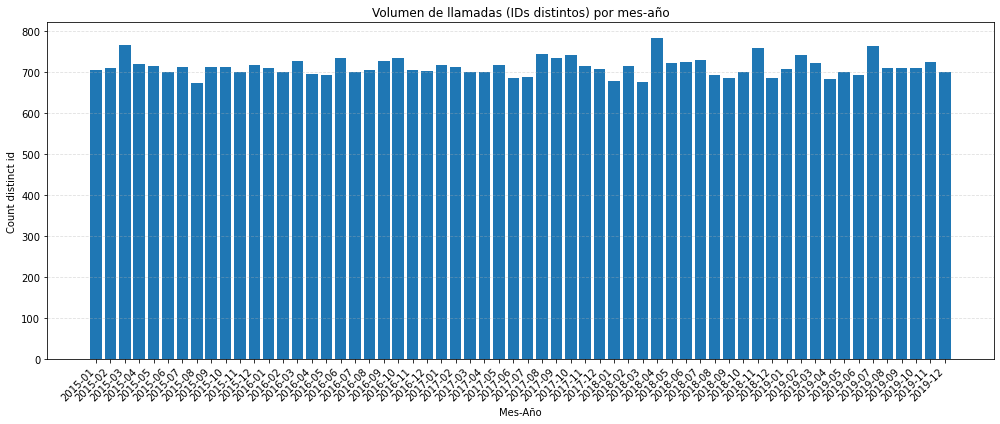

In [23]:
# Contar IDs distintos por mes-año usando df_fechas existente
ids_por_año_mes = df_fechas.groupby('año_mes')['id_'].nunique().sort_index()

# Preparar etiquetas y valores
labels = ids_por_año_mes.index.astype(str)
values = ids_por_año_mes.values

# Dibujar gráfico de barras
plt.figure(figsize=(14,6))
plt.bar(labels, values, color='tab:blue')
plt.xticks(rotation=45, ha='right')
plt.title('Volumen de llamadas (IDs distintos) por mes-año')
plt.xlabel('Mes-Año')
plt.ylabel('Count distinct id')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

Gráfico de linea para ver la tendencia de volumen mensual de llamadas
- Agregando una línea para marcar la media y los valores de cada mes

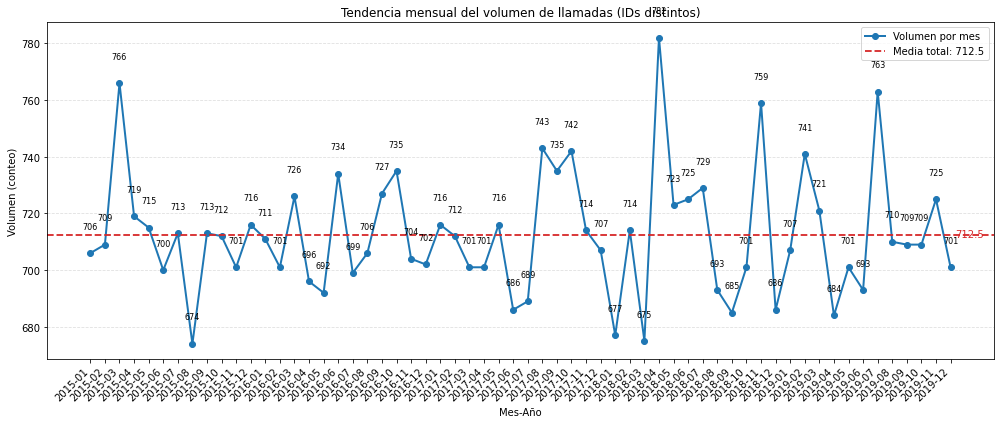

In [24]:

# Preparar eje x como índices numéricos para facilitar anotaciones
x = range(len(labels))

# Calcular la media total del volumen
media_total = values.mean()

# Crear figura
plt.figure(figsize=(14,6))

# Línea de tendencia (con marcadores en cada punto)
plt.plot(x, values, marker='o', color='tab:blue', linewidth=2, label='Volumen por mes')

# Incluir una línea horizontal de la media (entrecortada)
plt.axhline(media_total, color='tab:red', linestyle='--', linewidth=1.8, label=f'Media total: {media_total:.1f}')

# Agregar el valor de la media al final de la línea para mayor detalle
plt.text(len(x)-1 + 0.3, media_total, f'{media_total:.1f}', color='tab:red', va='center', fontsize=10)

# Agregar el valor (volumen) en cada punto
for i, v in enumerate(values):
    # Colocamos el texto ligeramente por encima del punto; ajusta va si deseas debajo
    plt.text(i, v + max(values)*0.01, f'{v}', ha='center', va='bottom', fontsize=8, rotation=0)

# Detalles de ejes y estilo
plt.xticks(ticks=x, labels=[str(l) for l in labels], rotation=45, ha='right')
plt.title('Tendencia mensual del volumen de llamadas (IDs distintos)')
plt.xlabel('Mes-Año')
plt.ylabel('Volumen (conteo)')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.legend()
plt.tight_layout()

# Mostrar gráfico
plt.show()

Gráfico de pastel para ver la distribución de los rangos de edad creados
- Incluyendo sus valores y su porcentage del total

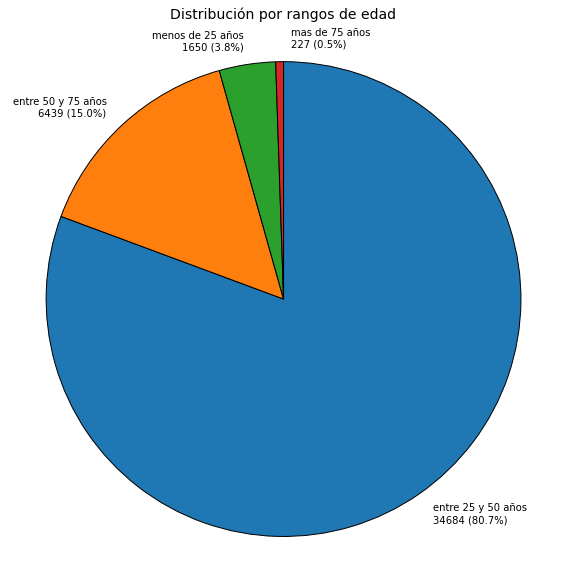

In [25]:
# Uso la columna 'rangos_edad', por si caso agrego un mensaje en caso de no existir al ser una columna creada
col = 'rangos_edad'
if col not in Bank_registros.columns:
    raise KeyError(f"La columna '{col}' no se encuentra en el DataFrame.")

# Contamos los registros y porcentajes por grupo de edad
counts = Bank_registros[col].value_counts().sort_values(ascending=False)
total = counts.sum()
pct = counts / total * 100

# Preparo etiquetas con nombre del grupo, conteo y porcentaje
labels = [f"{grp}\n{cnt} ({p:.1f}%)" for grp, cnt, p in zip(counts.index, counts.values, pct.values)]

# Dibujo el gráfico de pastel con fondo blanco y texto negro
plt.figure(figsize=(8, 8), facecolor='white')   # fondo blanco
ax = plt.gca()
ax.set_facecolor('white')                       # fondo del eje blanco

wedges, texts = plt.pie(
    counts.values,
    labels=labels,
    startangle=90,
    counterclock=False,
    wedgeprops=dict(edgecolor='black'),         # bordes negros
    textprops={'color': 'black', 'fontsize': 10} # texto negro y legible
)

# Título visible y en negro
plt.title('Distribución por rangos de edad', color='black', fontsize=14,pad=20)
# Dejamos más espacio arriba para evitar solapamientos
plt.subplots_adjust(top=0.80)

# --- Ajustamos la etiqueta del pedazo más pequeño porque se estaba sobreponiendo a otra  ---
# Identificamos el índice del valor más pequeño
idx_min = counts.values.argmin()

# Movemos manualmente su texto unos píxeles hacia la derecha porque se estaban sobreponiendo
x, y = texts[idx_min].get_position()
texts[idx_min].set_position((x + 0.05, y))  

# Cambio la alineación hacia la izquierda para poder ver bien el texto
texts[idx_min].set_ha('left')


plt.axis('equal')  # mantener forma circular
plt.tight_layout()
plt.show()


Gráfico de pastel para ver la distribución del estado civil
- Incluyendo sus valores y su porcentage del total

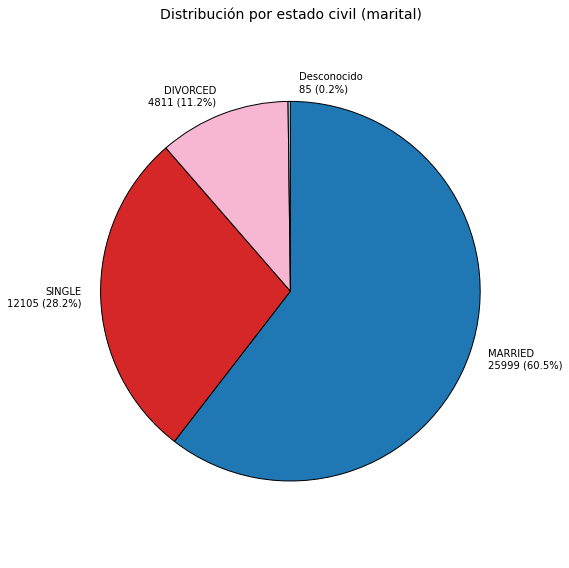

In [26]:
# Contamos los registros por estado civil ('marital'), reemplazando nulos por 'Desconocido'
counts_marital = Bank_registros['marital'].fillna('Desconocido').value_counts()

# Total para calcular porcentajes
total = counts_marital.sum()

# Prepararamos etiquetas con nombre del grupo, conteo y porcentaje (ej: Soltero\n123 (45.6%))
labels_marital = [f"{grp}\n{cnt} ({cnt/total*100:.1f}%)" for grp, cnt in zip(counts_marital.index, counts_marital.values)]

# Creamos la figura y aseguramos fondo blanco (coherente con gráfico anterior)
plt.figure(figsize=(8, 8), facecolor='white')
ax = plt.gca()
ax.set_facecolor('white')

# Paleta de colores (automática y suficiente para pocos grupos)
colors_marital = plt.cm.tab20(np.linspace(0, 1, len(counts_marital)))

# Dibujamos el gráfico de pastel
wedges_marital, texts_marital = plt.pie(
    counts_marital.values,
    labels=labels_marital,
    startangle=90,
    counterclock=False,
    wedgeprops=dict(edgecolor='black'),
    textprops={'color': 'black', 'fontsize': 10},
    colors=colors_marital
)

# Título del gráfico
plt.title('Distribución por estado civil (marital)', color='black', fontsize=14)

# Mejorar la posición de la etiqueta del sector más pequeño para evitar solapamientos
idx_min_marital = counts_marital.values.argmin()
x_min, y_min = texts_marital[idx_min_marital].get_position()
texts_marital[idx_min_marital].set_position((x_min + 0.05, y_min))
texts_marital[idx_min_marital].set_ha('left')

# Mantenemos proporciones circulares y mostramos
plt.axis('equal')
plt.tight_layout()
plt.show()

Gráfico de pastel para ver la distribución por método de contacto
- Incluyendo sus valores y su porcentage del total

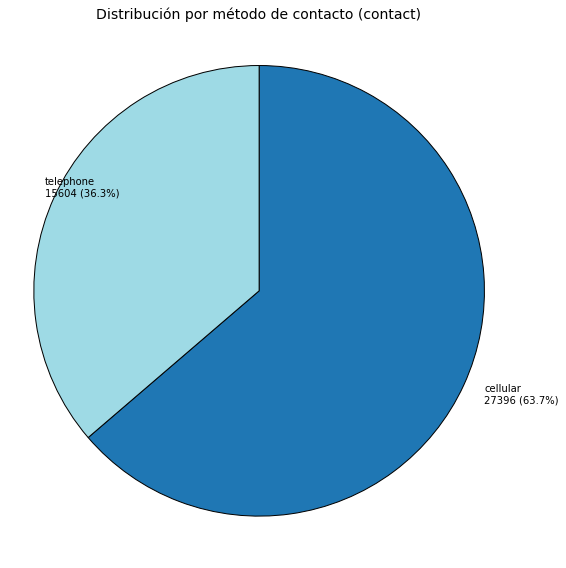

In [27]:
# Contamos los registros de contacto, reemplazando nulos por 'Desconocido'
counts_contact = Bank_registros['contact'].fillna('Desconocido').value_counts() # Reemplazar nulos por 'Desconocido'

# Total para calcular porcentajes
total = counts_contact.sum()

# Preparamos las etiquetas con nombre del grupo, conteo y porcentaje (ej: Soltero\n123 (45.6%))
labels_contact = [f"{grp}\n{cnt} ({cnt/total*100:.1f}%)" for grp, cnt in zip(counts_contact.index, counts_contact.values)]

# Creamos la figura y aseguramos fondo blanco (coherente con gráfico anterior)
plt.figure(figsize=(8, 8), facecolor='white')
ax = plt.gca()
ax.set_facecolor('white')

# Paleta de colores (automática y suficiente para pocos grupos)
colors_contact = plt.cm.tab20(np.linspace(0, 1, len(counts_contact)))

# Dibujamos el gráfico de pastel
wedges_contact, texts_contact = plt.pie(
    counts_contact.values,
    labels=labels_contact,
    startangle=90,
    counterclock=False,
    wedgeprops=dict(edgecolor='black'),
    textprops={'color': 'black', 'fontsize': 10},
    colors=colors_contact
)

# Título del gráfico
plt.title('Distribución por método de contacto (contact)', color='black', fontsize=14)

# Mejoramos la posición de la etiqueta del sector más pequeño para evitar solapamientos
idx_min_contact = counts_contact.values.argmin()
x_min, y_min = texts_contact[idx_min_contact].get_position()
texts_contact[idx_min_contact].set_position((x_min + 0.05, y_min))
texts_contact[idx_min_contact].set_ha('left')

# Mantenemos las proporciones circulares y mostrar
plt.axis('equal')
plt.tight_layout()
plt.show()

Gráfico de barras para ver la distribución por ocupación
- Incluyendo sus valores

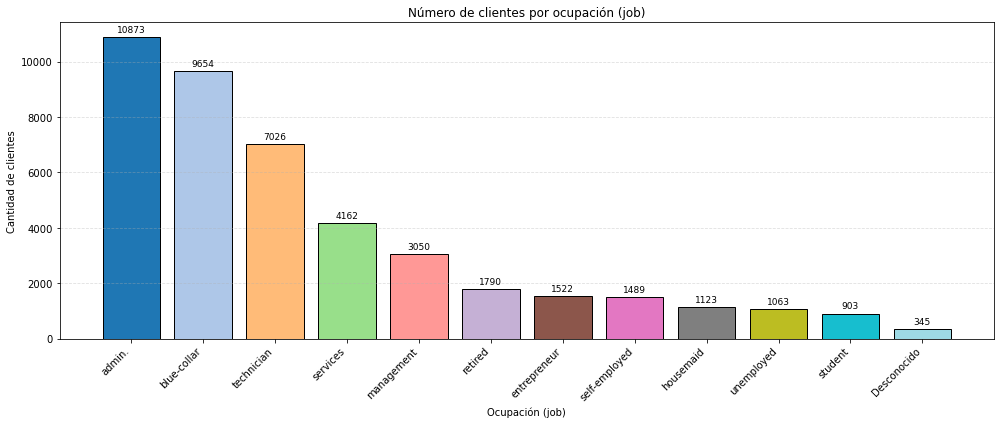

In [28]:
# Contamos los clientes por ocupación ('job'), incluyendo valores nulos como 'Desconocido'
counts_job = Bank_registros['job'].fillna('Desconocido').value_counts()

# Configuración del gráfico
plt.figure(figsize=(14,6))
colors = plt.cm.tab20(np.linspace(0, 1, len(counts_job)))  # paleta de colores

# Dibujamos barras ordenadas por volumen 
bars = plt.bar(counts_job.index, counts_job.values, color=colors, edgecolor='black')

# Agregamos las etiquetas de volumenencima de cada barra
max_val = counts_job.values.max()
for i, v in enumerate(counts_job.values):
    plt.text(i, v + max_val*0.01, f'{v}', ha='center', va='bottom', fontsize=9)

# Estética y etiquetas
plt.xticks(rotation=45, ha='right')
plt.title('Número de clientes por ocupación (job)')
plt.xlabel('Ocupación (job)')
plt.ylabel('Cantidad de clientes')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()

plt.show()

Gráfico de barras para ver la distribución del nivel de educación
- Incluyendo sus valores

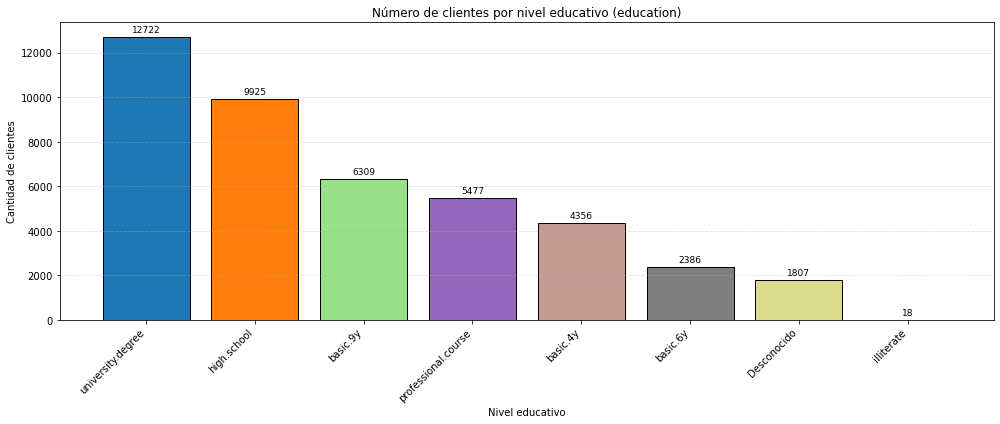

In [29]:
# Contamos los registros por nivel de educación, reemplazando nulos por 'Desconocido'
counts_education = Bank_registros['education'].fillna('Desconocido').value_counts()

# Preparamos paleta de colores según la cantidad de categorías
colors_education = plt.cm.tab20(np.linspace(0, 1, len(counts_education)))

# Dibujamos el gráfico de barras
plt.figure(figsize=(14,6), facecolor='white')     # tamaño y fondo de la figura
ax = plt.gca()
ax.set_facecolor('white')                          # fondo del eje en blanco

bars_education = plt.bar(counts_education.index, counts_education.values,
                         color=colors_education, edgecolor='black')

# Agregamos las etiquetas de volumen encima de cada barra
max_val = counts_education.values.max()
for i, v in enumerate(counts_education.values):
    plt.text(i, v + max_val*0.01, f'{v}', ha='center', va='bottom', fontsize=9)

# Estética y etiquetas
plt.xticks(rotation=45, ha='right')
plt.title('Número de clientes por nivel educativo (education)')
plt.xlabel('Nivel educativo')
plt.ylabel('Cantidad de clientes')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()

plt.show()

### 1.5.2 Gráficos estadísticos

Gráficos de distribuciones univariadas
- Me interesa especialmente ver las distribuciones univariadas de tres columnas que pueden afectar mi analisis y mi poder predictivo por tener valores muy distintos
- Estas son age y duracion_minutos
- Uso seaborn para crear tres gráficos que me peritan ver su distribución: un box plot, un gráfico de violin y un histograma 

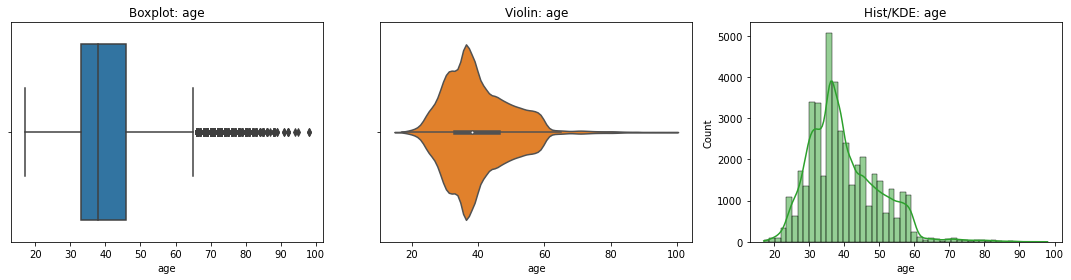

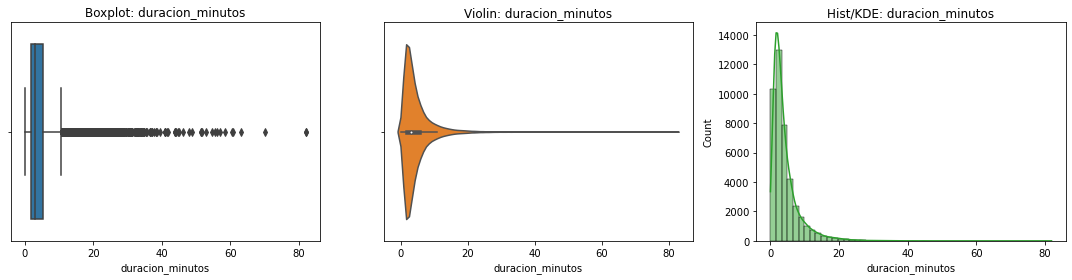

In [30]:
# Importo la librería seaborn para gráficos estadísticos avanzados, empiezo a ver distribuciones univariadas

# Copio el dataframe original para evitar hacer cambios en el
df = Bank_registros.copy()

# Creo gráficos de distribuciones univariadas: box + violin + hist para age, duracion_minutos y duration
plot_cols = ['age', 'duracion_minutos']
for c in plot_cols:
    if c not in df.columns:
        continue
    ser = df[c].dropna()
    if ser.empty:
        print(f"Sin datos para {c}")
        continue

    # Configuramos la figura con 3 subplots horizontales para verlos uno al lado del otro
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))

    # Creamos el grafico de boxplot
    sns.boxplot(x=ser, ax=axes[0], color='tab:blue')
    axes[0].set_title(f'Boxplot: {c}')

    # Creamos el grafico de violinplot
    sns.violinplot(x=ser, ax=axes[1], color='tab:orange')
    axes[1].set_title(f'Violin: {c}')

    # Creamos el grafico de histograma con KDE
    sns.histplot(ser, kde=True, ax=axes[2], color='tab:green', bins=50)
    axes[2].set_title(f'Hist/KDE: {c}')

    plt.tight_layout()
    plt.show()



Gráficos de Relación entre variables 

- Utilizo tres gráficos, para ver si existe una relación visual entre dos variables numericas que yo elija. 
- Incluyo un scatter para ver la nube de puntos, una línea de regresión para la tendencia y las métricas de correlación (Pearson y Spearman) para cuantificar la fuerza y dirección de la relación.

**Relación entre la edad y la duración de llamadas**

Correlación Pearson (age vs duracion_minutos): 0.003
Correlación Spearman (age vs duracion_minutos): 0.001


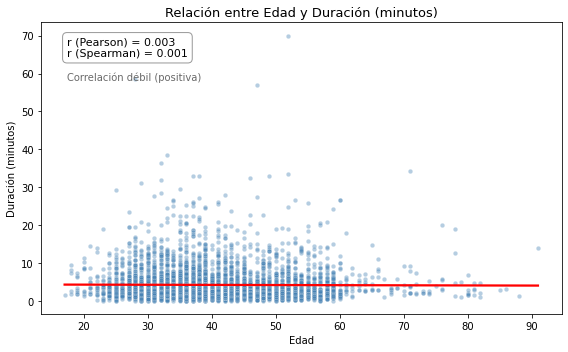

In [31]:
# Relación Age vs Duracion_minutos (scatter + regresión + correlación visual)
if {'age', 'duracion_minutos'}.issubset(df.columns):
    df_xy = df[['age', 'duracion_minutos']].dropna()
    if not df_xy.empty:
        # Tomamos una muestra para que el gráfico sea manejable
        sample = df_xy.sample(n=min(5000, len(df_xy)), random_state=42)

        # Calculamos correlaciones
        pearson = df_xy['age'].corr(df_xy['duracion_minutos'])
        spearman = df_xy['age'].corr(df_xy['duracion_minutos'], method='spearman')

        # Mostramos valores en consola
        print(f"Correlación Pearson (age vs duracion_minutos): {pearson:.3f}")
        print(f"Correlación Spearman (age vs duracion_minutos): {spearman:.3f}")

        # Creamos el gráfico de dispersión
        plt.figure(figsize=(8,5))
        sns.scatterplot(data=sample, x='age', y='duracion_minutos', alpha=0.4, s=20, color='steelblue')
        sns.regplot(data=sample, x='age', y='duracion_minutos', scatter=False, color='red', ci=None)

        # Título y etiquetas
        plt.title('Relación entre Edad y Duración (minutos)', fontsize=13)
        plt.xlabel('Edad')
        plt.ylabel('Duración (minutos)')

        # Añadimos texto con la correlación en el gráfico
        texto_corr = f"r (Pearson) = {pearson:.3f}\nr (Spearman) = {spearman:.3f}"
        plt.text(
            0.05, 0.95, texto_corr,
            transform=plt.gca().transAxes,
            fontsize=11, color='black',
            verticalalignment='top',
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray', boxstyle='round,pad=0.4')
        )

        # Interpretación rápida
        if abs(pearson) < 0.3:
            interpretacion = "Correlación débil"
        elif abs(pearson) < 0.7:
            interpretacion = "Correlación moderada"
        else:
            interpretacion = "Correlación fuerte"

        signo = "positiva" if pearson > 0 else "negativa" if pearson < 0 else "nula"
        plt.text(
            0.05, 0.80, f"{interpretacion} ({signo})",
            transform=plt.gca().transAxes,
            fontsize=10, color='dimgray'
        )

        plt.tight_layout()
        plt.show()



**Relación entre el nivel de educación y la duración de llamadas**

- Al ser una de las variables numerica sutilizo ahora un boxplot

Correlación Pearson (education vs duracion_minutos): 0.016
Correlación Spearman (education vs duracion_minutos): 0.027


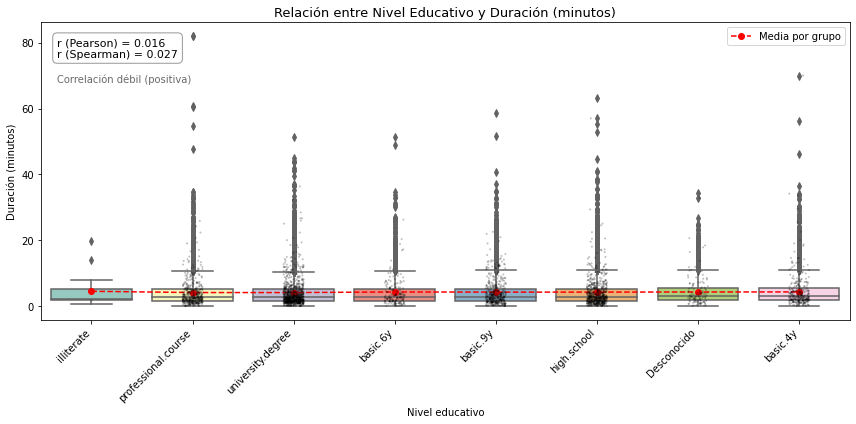

In [32]:
# Relación Education vs Duracion_minutos (boxplot + correlación visual)
if 'education' in df.columns and 'duracion_minutos' in df.columns:
    df_edu = df[['education', 'duracion_minutos']].copy()
    df_edu['education'] = df_edu['education'].fillna('Desconocido')
    df_edu = df_edu.dropna(subset=['duracion_minutos'])

    # Ordenamos por mediana para una visualización lógica
    order = df_edu.groupby('education')['duracion_minutos'].median().sort_values().index

    # Codificamos education de forma ordinal para calcular correlación
    edu_map = {edu: i for i, edu in enumerate(order)}
    df_edu['education_num'] = df_edu['education'].map(edu_map)

    # Calculamos correlaciones
    pearson = df_edu['education_num'].corr(df_edu['duracion_minutos'])
    spearman = df_edu['education_num'].corr(df_edu['duracion_minutos'], method='spearman')

    print(f"Correlación Pearson (education vs duracion_minutos): {pearson:.3f}")
    print(f"Correlación Spearman (education vs duracion_minutos): {spearman:.3f}")

    # Creamos gráfico tipo boxplot + jitter
    plt.figure(figsize=(12,6))
    sns.boxplot(x='education', y='duracion_minutos', data=df_edu, order=order, palette='Set3')
    sns.stripplot(x='education', y='duracion_minutos',
                  data=df_edu.sample(n=min(3000, len(df_edu)), random_state=42),
                  order=order, color='k', size=2, alpha=0.25, jitter=True)

    # Calculamos y dibujamos la media de cada grupo para ver tendencia
    medias = df_edu.groupby('education')['duracion_minutos'].mean().reindex(order)
    plt.plot(range(len(medias)), medias.values, color='red', linestyle='--', marker='o', label='Media por grupo')
    plt.legend()

    # Título y etiquetas
    plt.title('Relación entre Nivel Educativo y Duración (minutos)', fontsize=13)
    plt.xlabel('Nivel educativo')
    plt.ylabel('Duración (minutos)')
    plt.xticks(rotation=45, ha='right')

    # Texto con correlación dentro del gráfico
    texto_corr = f"r (Pearson) = {pearson:.3f}\nr (Spearman) = {spearman:.3f}"
    plt.text(
        0.02, 0.95, texto_corr,
        transform=plt.gca().transAxes,
        fontsize=11, color='black',
        verticalalignment='top',
        bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray', boxstyle='round,pad=0.4')
    )

    # Interpretación rápida
    if abs(pearson) < 0.3:
        interpretacion = "Correlación débil"
    elif abs(pearson) < 0.7:
        interpretacion = "Correlación moderada"
    else:
        interpretacion = "Correlación fuerte"

    signo = "positiva" if pearson > 0 else "negativa" if pearson < 0 else "nula"
    plt.text(
        0.02, 0.80, f"{interpretacion} ({signo})",
        transform=plt.gca().transAxes,
        fontsize=10, color='dimgray'
    )

    plt.tight_layout()
    plt.show()


Como veo que estos gráficos son utiles y los voy a querer utilizar con mi otra tabla de datos tambien, he dedidio crear una funcion para que dependiendo el tipo de variable, crear un boxplot o un scatterplot con correlaciones entre varialbes que decido darlo como input a la funcion

In [33]:
# Defino mi función
def plot_correlation(df, x, y, sample_size=5000):
    """
    Función para analizar y visualizar la relación entre dos variables de un DataFrame.
    
    Dependiendo del tipo de la variable X:
    - Si X es numérica → genera un gráfico de dispersión (scatter plot) con línea de tendencia (regresión lineal).
    - Si X es categórica → genera un boxplot ordenado con puntos dispersos (jitter) y una línea de medias por grupo.
    
    Además:
    - Calcula las correlaciones de Pearson y Spearman.
    - Muestra los resultados en el gráfico y los imprime en consola.
    - Añade una breve interpretación sobre la fuerza y el signo de la correlación.
    """

    # Hago primero una validación básica, para verificar que las columnas existan en el DataFrame.
    if not {x, y}.issubset(df.columns):
        raise KeyError(f"Alguna columna no existe en el DataFrame: {x}, {y}")
    
    # Eliminamos filas con valores nulos en las dos columnas analizadas.
    df_xy = df[[x, y]].dropna()
    if df_xy.empty:
        print("No hay datos suficientes para graficar.")
        return

    # Uso un if para detectar el tipo de variable X
    # Si X es numérica → scatter plot
    # Si X es categórica → boxplot
    if pd.api.types.is_numeric_dtype(df_xy[x]):

        # Si la Variable X es numérica

        # Tomamos una muestra para evitar gráficos muy pesados si hay demasiados datos.
        sample = df_xy.sample(n=min(sample_size, len(df_xy)), random_state=42)
        
        # Calculamos las correlaciones:
        # - Pearson mide relación lineal.
        # - Spearman mide relación monotónica (ordenada).
        pearson = df_xy[x].corr(df_xy[y])
        spearman = df_xy[x].corr(df_xy[y], method='spearman')
        
        # Creamos un gráfico de Dispersión + Línea de regresión
        plt.figure(figsize=(8,5))
        sns.scatterplot(data=sample, x=x, y=y, alpha=0.4, s=20, color='steelblue')  # puntos azules transparentes
        sns.regplot(data=sample, x=x, y=y, scatter=False, color='red', ci=None)      # línea roja de tendencia
        
        plt.title(f'Relación entre {x} y {y}', fontsize=13)
        plt.xlabel(x)
        plt.ylabel(y)
    
    else:
        # Si la Variable X es categórica

        # Rellenamos valores faltantes y ordenamos las categorías según la mediana del valor Y
        df_xy[x] = df_xy[x].fillna('Desconocido')
        order = df_xy.groupby(x)[y].median().sort_values().index
        
        # Para poder calcular correlación con variables categóricas,
        # asignamos valores numéricos a cada categoría (codificación ordinal).
        cat_map = {cat: i for i, cat in enumerate(order)}
        df_xy['x_num'] = df_xy[x].map(cat_map)
        
        # Calculamos las correlaciones usando la versión numérica de X.
        pearson = df_xy['x_num'].corr(df_xy[y])
        spearman = df_xy['x_num'].corr(df_xy[y], method='spearman')

        # Creamos un gráfico Boxplot ordenado + puntos dispersos + línea de medias
        plt.figure(figsize=(12,6))
        sns.boxplot(x=x, y=y, data=df_xy, order=order, palette='Set3')  # boxplot por categoría
        sns.stripplot(                                                  
            x=x, y=y, data=df_xy.sample(n=min(sample_size, len(df_xy)), random_state=42),
            order=order, color='k', size=2, alpha=0.25, jitter=True     # puntos negros con dispersión
        )
        
        # Calculamos la media por categoría y la graficamos con una línea roja punteada
        medias = df_xy.groupby(x)[y].mean().reindex(order)
        plt.plot(range(len(medias)), medias.values, color='red', linestyle='--', marker='o', label='Media por grupo')
        
        plt.legend()
        plt.xticks(rotation=45, ha='right')
        plt.title(f'Relación entre {x} y {y}', fontsize=13)
        plt.xlabel(x)
        plt.ylabel(y)
    
    # Por último, mostramos las correlaciones en el gráfico
    texto_corr = f"r (Pearson) = {pearson:.3f}\nr (Spearman) = {spearman:.3f}"
    
    # Mostramos los valores dentro de una caja blanca en la esquina superior izquierda del gráfico
    plt.text(
        0.02, 0.95, texto_corr,
        transform=plt.gca().transAxes,
        fontsize=11, color='black',
        verticalalignment='top',
        bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray', boxstyle='round,pad=0.4')
    )

    # Incluimos una interpretación automática del resultado ---
    # Clasificamos la fuerza de la correlación en débil, moderada o fuerte.
    if abs(pearson) < 0.3:
        interpretacion = "Correlación débil"
    elif abs(pearson) < 0.7:
        interpretacion = "Correlación moderada"
    else:
        interpretacion = "Correlación fuerte"
    
    # Determinamos el signo (positiva, negativa o nula)
    signo = "positiva" if pearson > 0 else "negativa" if pearson < 0 else "nula"
    
    # Añadimos texto con interpretación al gráfico
    plt.text(
        0.02, 0.80, f"{interpretacion} ({signo})",
        transform=plt.gca().transAxes,
        fontsize=10, color='dimgray'
    )

    # Ajustamos márgenes y mostramos el gráfico
    plt.tight_layout()
    plt.show()
    
    # --- 5️⃣ También mostramos los valores en consola ---
    print(f"Correlación Pearson ({x} vs {y}): {pearson:.3f}")
    print(f"Correlación Spearman ({x} vs {y}): {spearman:.3f}")
    print(f"Interpretación: {interpretacion} ({signo})")


**Relación entre el la ocupación (tipo de trabajo) y la duración de llamadas**

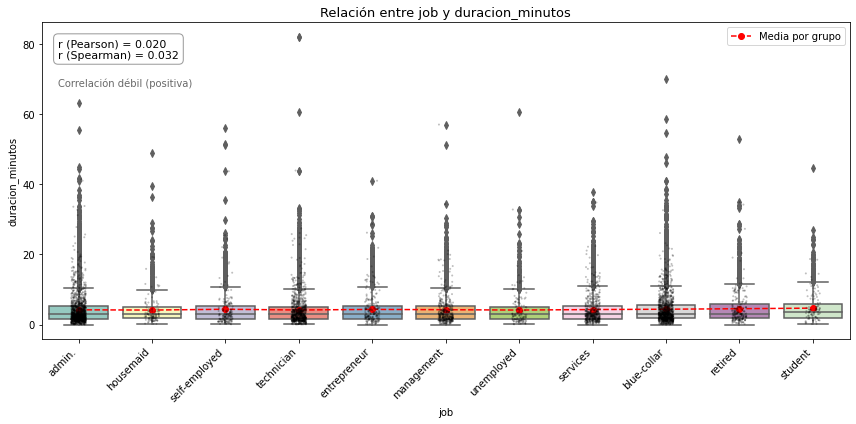

Correlación Pearson (job vs duracion_minutos): 0.020
Correlación Spearman (job vs duracion_minutos): 0.032
Interpretación: Correlación débil (positiva)


In [34]:
# Uso mi función personalizada
plot_correlation(df, 'job', 'duracion_minutos')

## 1.5 Guardar el archivo con los datos limpios en el mismo path

In [35]:
import os

# Guardar Bank_registros_limpio en Excel en el mismo directorio del archivo origen
 
# Usar la misma ruta del csv original para guardar el Excel
dir_path = os.path.dirname(csv_path)
output_filename = "Bank_registros_limpio.xlsx"
output_path = os.path.join(dir_path, output_filename)

# Intentar guardar en Excel; si falla, guardar como CSV de respaldo
try:
    Bank_registros.to_excel(output_path, index=False)
    print(f"Archivo guardado correctamente: {output_path}")
except Exception as e:
    print(f"Error al guardar Excel: {e}")
    csv_backup = os.path.join(destino_dir, "Bank_registros_limpio.csv")
    try:
        Bank_registros.to_csv(csv_backup, index=False)
        print(f"Se guardó como CSV en su lugar: {csv_backup}")
    except Exception as e2:
        print(f"Error al guardar CSV de respaldo: {e2}")

Archivo guardado correctamente: C:\Users\nicol\OneDrive - Universidad San Francisco de Quito\Escritorio\THE POWER - BOOTCAMP\DATA ANALYTICS\PROYECTOS - ENTREGAS\4. PYTHON_EDA\Manejo_de_Datos\DatosBruto\Bank_registros_limpio.xlsx


# 2. EDA Características clientes - Archivo Customer-details

## 2.1 Importar los datos del Archivo customer-details y crear un data frame

In [36]:
# Ruta del archivo Excel (raw string para evitar problemas con backslashes)
excel_path = r"C:\Users\nicol\OneDrive - Universidad San Francisco de Quito\Escritorio\THE POWER - BOOTCAMP\DATA ANALYTICS\PROYECTOS - ENTREGAS\4. PYTHON_EDA\Manejo_de_Datos\DatosBruto\customer-details.xlsx"

# Leer todas las hojas y concatenarlas en un solo DataFrame
# (pandas ya está importado en el notebook como pd)
sheets = pd.read_excel(excel_path, sheet_name=None, index_col=0)  # devuelve dict: {sheet_name: DataFrame}
# Concatenar las hojas (equivalente a ir haciendo append una a una); usamos ignore_index=True para reindexar
Caracteristicas_clientes = pd.concat(sheets.values(), ignore_index=True, sort=False)

# Verificación rápida
print("Hojas leídas:", list(sheets.keys()))
print("Registros totales combinados:", len(Caracteristicas_clientes))
Caracteristicas_clientes.head()

Hojas leídas: ['2012', '2013', '2014']
Registros totales combinados: 43170


,Income,Kidhome,Teenhome,Dt_Customer,NumWebVisitsMonth,ID
0,161770.0,1.0,0.0,2012-04-04,29.0,089b39d8-e4d0-461b-87d4-814d71e0e079
1,85477.0,1.0,1.0,2012-12-30,7.0,e9d37224-cb6f-4942-98d7-46672963d097
2,147233.0,1.0,1.0,2012-02-02,5.0,3f9f49b5-e410-4948-bf6e-f9244f04918b
3,121393.0,1.0,2.0,2012-12-21,29.0,9991fafb-4447-451a-8be2-b0df6098d13e
4,63164.0,1.0,2.0,2012-06-20,20.0,eca60b76-70b6-4077-80ba-bc52e8ebb0eb


## 2.2 Exploración inicial de los datos y sus caracteríaticas

In [37]:
# 1. Contar cuantas filas y columnas tiene el DataFrame en total para tener una mejor idea de mis datos y su tamaño usando shape
print("Cantidad de filas y columnas:")
print(Caracteristicas_clientes.shape)

Cantidad de filas y columnas:
(43170, 6)


In [38]:
# 2. Verificar los tipos de datos de cada columna usando dtypes
print("\nTipos de datos de cada columna:")
print(Caracteristicas_clientes.dtypes)


Tipos de datos de cada columna:
Income                      float64
Kidhome                     float64
Teenhome                    float64
Dt_Customer          datetime64[ns]
NumWebVisitsMonth           float64
ID                           object
dtype: object


In [39]:
# 3. Veo las principales Estadísticas descriptivas para columnas numéricas usando describe()
print("\nEstadísticas descriptivas de columnas numéricas:")
Caracteristicas_clientes.describe()


Estadísticas descriptivas de columnas numéricas:


,Income,Kidhome,Teenhome,NumWebVisitsMonth
count,43170.000000,43170.000000,43170.000000,43170.000000
mean,93227.389622,1.004749,0.998633,16.591290
std,50498.181989,0.815996,0.816008,9.241769
min,5841.000000,0.000000,0.000000,1.000000
25%,49608.000000,0.000000,0.000000,9.000000
50%,93009.500000,1.000000,1.000000,17.000000
75%,136740.500000,2.000000,2.000000,25.000000
max,180802.000000,2.000000,2.000000,32.000000


In [40]:
# 4. Ahora veo las estadísticas descriptivas para columnas categóricas/objetos
print("\nEstadísticas descriptivas de columnas categóricas:")
Caracteristicas_clientes.describe(include=['object'])


Estadísticas descriptivas de columnas categóricas:


,ID
count,43170
unique,43170
top,089b39d8-e4d0-461b-87d4-814d71e0e079
freq,1


In [41]:
# 5. Verifico los valores nulos por columna aplicando una sumatoria a isnull()
print("\nCantidad de valores nulos por columna:")
Caracteristicas_clientes.isnull().sum()


Cantidad de valores nulos por columna:


Income               0
Kidhome              0
Teenhome             0
Dt_Customer          0
NumWebVisitsMonth    0
ID                   0
dtype: int64

Al ver que los datos están bastante limpios y no tengo nulls, no hago una tabla mas avanzada como lo hice con el otro dataframe

## 2.3 Transformación y limpieza de datos

### 2.3.1 Transformacion de datos

In [42]:
# Convertir columnas que representan conteos a tipo entero
cols_to_int = ['Kidhome', 'Teenhome', 'NumWebVisitsMonth']

for col in cols_to_int:
    if col in Caracteristicas_clientes.columns:
        Caracteristicas_clientes[col] = Caracteristicas_clientes[col].fillna(0).round().astype(np.int64)
    else:
        print(f"Columna no encontrada: {col}")

# Asegurar que 'Income' siga siendo float pero con solo 1 decimal
if 'Income' in Caracteristicas_clientes.columns:
    # Primero normalizamos posibles separadores de miles (ej: "161,770.000") y convertimos a numérico
    # Si ya es float esto también funciona sin problema.
    Caracteristicas_clientes['Income'] = (
        Caracteristicas_clientes['Income']
        .astype(str)
        .str.replace(',', '', regex=False)          # quitar separador de miles si existe
    )
    Caracteristicas_clientes['Income'] = pd.to_numeric(Caracteristicas_clientes['Income'], errors='coerce').round(1)

    # Verificación rápida
    print("Income -> dtype:", Caracteristicas_clientes['Income'].dtype)
    display(Caracteristicas_clientes['Income'].head())
else:
    print("Columna 'Income' no encontrada en Caracteristicas_clientes")

# Verificamos el cambio mostrando los tipos de datos y un preview de las columnas convertidas
print(Caracteristicas_clientes[cols_to_int].dtypes)
Caracteristicas_clientes[cols_to_int].head()


Income -> dtype: float64


0    161770.0
1     85477.0
2    147233.0
3    121393.0
4     63164.0
Name: Income, dtype: float64

Kidhome              int64
Teenhome             int64
NumWebVisitsMonth    int64
dtype: object


,Kidhome,Teenhome,NumWebVisitsMonth
0,1,0,29
1,1,1,7
2,1,1,5
3,1,2,29
4,1,2,20


### 2.3.2 Creación de nuevas columnas - agrupando datos

In [43]:
# Crear columna 'total_hijos' sumando Kidhome y Teenhome
# Suponemos que Caracteristicas_clientes ya existe en el notebook (cargado previamente)
# Rellenamos posibles NaN con 0 antes de la suma y convertimos el resultado a entero
if 'Kidhome' not in Caracteristicas_clientes.columns or 'Teenhome' not in Caracteristicas_clientes.columns:
    raise KeyError("Faltan las columnas 'Kidhome' y/o 'Teenhome' en Caracteristicas_clientes")

Caracteristicas_clientes['total_hijos'] = (
    Caracteristicas_clientes['Kidhome'].fillna(0) +
    Caracteristicas_clientes['Teenhome'].fillna(0)
).astype(int)

# Mostrar comprobación rápida de la nueva columna
print("Se creó la columna 'total_hijos'. Primeras filas de ejemplo:")
Caracteristicas_clientes[['Kidhome', 'Teenhome', 'total_hijos']].head()

Se creó la columna 'total_hijos'. Primeras filas de ejemplo:


,Kidhome,Teenhome,total_hijos
0,1,0,1
1,1,1,2
2,1,1,2
3,1,2,3
4,1,2,3


In [44]:
# Crear 'rango_ingresos' usando una función estilo if/elif (tramos de 50k)
ing = pd.to_numeric(Caracteristicas_clientes['Income'], errors='coerce')

def agrupar_rango_ingresos(val):
    if pd.isnull(val):
        return "Desconocido"
    # trabajar con valores negativos como categoría separada
    if val < 0:
        return "Negativo"
    # calcular bucket de 50k (0 -> 0-50k, 1 -> 50k-100k, ...)
    b = int(val // 50000)
    if b == 0:
        return "0 a 50k"
    return f"{b*50}k a {(b+1)*50}k"

# Aplicar la función y crear la columna
Caracteristicas_clientes['rango_ingresos'] = ing.apply(agrupar_rango_ingresos)

# Mostrar un resumen ordenado por tramo (ordinal según el valor numérico del tramo)
# Para ordenar correctamente extraemos el límite inferior numérico
def _bucket_key(label):
    if label == "Desconocido":
        return float('inf')
    if label == "Negativo":
        return -1
    # "0 a 50k" o "50k a 100k" -> tomamos la parte antes de ' a ' y removemos 'k'
    low = label.split(' a ')[0].replace('k','')
    return int(low)

resumen = Caracteristicas_clientes['rango_ingresos'].value_counts().sort_index(key=lambda idx: idx.map(_bucket_key))
print("Conteo por rango_ingresos:")
print(resumen)

Conteo por rango_ingresos:
0 a 50k        10897
50k a 100k     12409
100k a 150k    12347
150k a 200k     7517
Name: rango_ingresos, dtype: int64


In [45]:
# Crear columna 'tenure_years' que indica cuantos años lleva el cliente con el banco
# Se usa la columna 'Dt_Customer' (datetime) y la fecha actual.
# Nota: se considera un año = 365.25 días para aproximar años con leap years.
today = pd.Timestamp.today().normalize()  # fecha actual (sin tiempo)

# Calcular días de antigüedad; resultará NaN si Dt_Customer es NaT
tenure_days = (today - Caracteristicas_clientes['Dt_Customer']).dt.days

# Convertir a años (floorear hacia abajo) y eliminar valores negativos (si los hubiera)
tenure_years = np.floor(tenure_days / 365.25)
tenure_years = tenure_years.clip(lower=0)  # evita años negativos en caso de fechas futuras

# Asignar como entero nullable (Int64) para preservar NA cuando Dt_Customer sea NaT
Caracteristicas_clientes['tenure_years'] = tenure_years.where(tenure_days.notna()).astype('Int64')

# Mostrar comprobación rápida
print("Resumen de la nueva columna 'tenure_years':")
print(Caracteristicas_clientes['tenure_years'].describe())
Caracteristicas_clientes[['Dt_Customer', 'tenure_years']].head()

Resumen de la nueva columna 'tenure_years':
count    43170.000000
mean        11.945587
std          0.963428
min         10.000000
25%         11.000000
50%         12.000000
75%         13.000000
max         13.000000
Name: tenure_years, dtype: float64


,Dt_Customer,tenure_years
0,2012-04-04,13
1,2012-12-30,12
2,2012-02-02,13
3,2012-12-21,12
4,2012-06-20,13


In [46]:
# Crear nueva columna 'visitas_mensuales' agrupando NumWebVisitsMonth en tramos de 10 en 10
source_col = 'NumWebVisitsMonth'

# Función para agrupar las visitas mensuales en intervalos de 10 en 10
def agrupar_visitas(visitas):
    """
    Agrupa el número de visitas en rangos de 10 en 10 (0-10, 10-20, etc.).
    Controla valores nulos, negativos o no numéricos.
    """
    if pd.isnull(visitas):
        return "Desconocido"
    try:
        v = int(visitas)
    except Exception:
        return "Desconocido"

    if v < 0:
        return "Negativo"
    elif v < 10:
        return "0 a 10 visitas"
    elif v < 20:
        return "10 a 20 visitas"
    elif v < 30:
        return "20 a 30 visitas"
    elif v < 40:
        return "30 a 40 visitas"
    elif v < 50:
        return "40 a 50 visitas"
    elif v < 60:
        return "50 a 60 visitas"
    elif v < 70:
        return "60 a 70 visitas"
    elif v < 80:
        return "70 a 80 visitas"
    elif v < 90:
        return "80 a 90 visitas"
    elif v < 100:
        return "90 a 100 visitas"
    else:
        return "Más de 100 visitas"

# Aplicar la función para crear la nueva columna
Caracteristicas_clientes['visitas_mensuales'] = Caracteristicas_clientes[source_col].apply(agrupar_visitas)

# Mostrar resumen ordenado lógicamente
orden_visitas = [
    "Negativo", "Desconocido",
    "0 a 10 visitas", "10 a 20 visitas", "20 a 30 visitas", "30 a 40 visitas", 
    "40 a 50 visitas", "50 a 60 visitas", "60 a 70 visitas", "70 a 80 visitas",
    "80 a 90 visitas", "90 a 100 visitas", "Más de 100 visitas"
]

conteo_visitas = Caracteristicas_clientes['visitas_mensuales'].value_counts().reindex(orden_visitas).dropna()

print("Valores únicos y conteos en 'visitas_mensuales' (ordenados):")
print(conteo_visitas)


Valores únicos y conteos en 'visitas_mensuales' (ordenados):
0 a 10 visitas     11959.0
10 a 20 visitas    13461.0
20 a 30 visitas    13618.0
30 a 40 visitas     4132.0
Name: visitas_mensuales, dtype: float64


### 2.3.3 Verificacion de la calidad de los datos

In [47]:
# Verificar si hay columnas duplicadas
duplicadas = Caracteristicas_clientes.columns[Caracteristicas_clientes.columns.duplicated()].tolist()

if duplicadas:
    print("⚠️ Columnas duplicadas encontradas:")
    print(duplicadas)
else:
    print("✅ No hay columnas duplicadas.")


✅ No hay columnas duplicadas.


In [48]:
# Estadísticas descriptivas completas del DataFrame 'Caracteristicas_clientes'
# (usa las variables y librerías ya cargadas en el notebook)

# 1) Resumen general (incluye todas las columnas)
print("=== Resumen general (describe include='all') ===")
display(Caracteristicas_clientes.describe(include='all').T)

# 2) Estadísticas para columnas numéricas
print("\n=== Estadísticas numéricas ===")
display(Caracteristicas_clientes.select_dtypes(include=[np.number]).describe().T)

# 3) Estadísticas para columnas categóricas (object / category)
print("\n=== Estadísticas categóricas (object/category) ===")
display(Caracteristicas_clientes.select_dtypes(include=['object', 'category']).describe().T)

# 4) Estadísticas para columnas datetime (min, max, nulos)
fechas = Caracteristicas_clientes.select_dtypes(include=['datetime64[ns]'])
if not fechas.empty:
    print("\n=== Estadísticas de columnas datetime ===")
    for c in fechas.columns:
        print(f"\nColumna: {c}")
        print(f"  min: {Caracteristicas_clientes[c].min()}")
        print(f"  max: {Caracteristicas_clientes[c].max()}")
        print(f"  nulos: {Caracteristicas_clientes[c].isnull().sum()}")

# 5) Tipos, conteo de nulos y valores únicos por columna (resumen útil)
print("\n=== Tipos, non-null, null y únicos por columna ===")
info = pd.DataFrame({
    "dtype": Caracteristicas_clientes.dtypes,
    "non_null_count": Caracteristicas_clientes.notnull().sum(),
    "null_count": Caracteristicas_clientes.isnull().sum(),
    "unique_count": Caracteristicas_clientes.nunique(dropna=False)
})
display(info)

# 6) Estadísticas adicionales para numéricas: skew y kurtosis
num = Caracteristicas_clientes.select_dtypes(include=[np.number])
if not num.empty:
    print("\n=== Skewness y Kurtosis (numéricas) ===")
    extras = pd.DataFrame({
        "skew": num.skew(),
        "kurtosis": num.kurtosis()
    })
    display(extras)

=== Resumen general (describe include='all') ===


C:\Users\nicol\AppData\Local\Temp\ipykernel_23488\2243576610.py:6: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  display(Caracteristicas_clientes.describe(include='all').T)


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
Income,43170.0,NaN,NaN,NaN,NaT,NaT,93227.389622,50498.181989,5841.0,49608.0,93009.5,136740.5,180802.0
Kidhome,43170.0,NaN,NaN,NaN,NaT,NaT,1.004749,0.815996,0.0,0.0,1.0,2.0,2.0
Teenhome,43170.0,NaN,NaN,NaN,NaT,NaT,0.998633,0.816008,0.0,0.0,1.0,2.0,2.0
Dt_Customer,43170,1096,2012-08-10 00:00:00,79,2012-01-01,2014-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumWebVisitsMonth,43170.0,NaN,NaN,NaN,NaT,NaT,16.59129,9.241769,1.0,9.0,17.0,25.0,32.0
ID,43170,43170,089b39d8-e4d0-461b-87d4-814d71e0e079,1,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_hijos,43170.0,NaN,NaN,NaN,NaT,NaT,2.003382,1.152982,0.0,1.0,2.0,3.0,4.0
rango_ingresos,43170,4,50k a 100k,12409,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure_years,43170.0,NaN,NaN,NaN,NaT,NaT,11.945587,0.963428,10.0,11.0,12.0,13.0,13.0
visitas_mensuales,43170,4,20 a 30 visitas,13618,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN



=== Estadísticas numéricas ===


,count,mean,std,min,25%,50%,75%,max
Income,43170.0,93227.389622,50498.181989,5841.0,49608.0,93009.5,136740.5,180802.0
Kidhome,43170.0,1.004749,0.815996,0.0,0.0,1.0,2.0,2.0
Teenhome,43170.0,0.998633,0.816008,0.0,0.0,1.0,2.0,2.0
NumWebVisitsMonth,43170.0,16.591290,9.241769,1.0,9.0,17.0,25.0,32.0
total_hijos,43170.0,2.003382,1.152982,0.0,1.0,2.0,3.0,4.0
tenure_years,43170.0,11.945587,0.963428,10.0,11.0,12.0,13.0,13.0



=== Estadísticas categóricas (object/category) ===


,count,unique,top,freq
ID,43170,43170,089b39d8-e4d0-461b-87d4-814d71e0e079,1
rango_ingresos,43170,4,50k a 100k,12409
visitas_mensuales,43170,4,20 a 30 visitas,13618



=== Estadísticas de columnas datetime ===

Columna: Dt_Customer
  min: 2012-01-01 00:00:00
  max: 2014-12-31 00:00:00
  nulos: 0

=== Tipos, non-null, null y únicos por columna ===


,dtype,non_null_count,null_count,unique_count
Income,float64,43170,0,38310
Kidhome,int64,43170,0,3
Teenhome,int64,43170,0,3
Dt_Customer,datetime64[ns],43170,0,1096
NumWebVisitsMonth,int64,43170,0,32
ID,object,43170,0,43170
total_hijos,int32,43170,0,5
rango_ingresos,object,43170,0,4
tenure_years,Int64,43170,0,4
visitas_mensuales,object,43170,0,4



=== Skewness y Kurtosis (numéricas) ===


,skew,kurtosis
Income,0.004075,-1.199770
Kidhome,-0.008719,-1.498107
Teenhome,0.002509,-1.498200
NumWebVisitsMonth,-0.008223,-1.202956
total_hijos,-0.007319,-0.747640
tenure_years,-0.312762,-1.133926


## 2.4 Exploración de datos usando gráficos

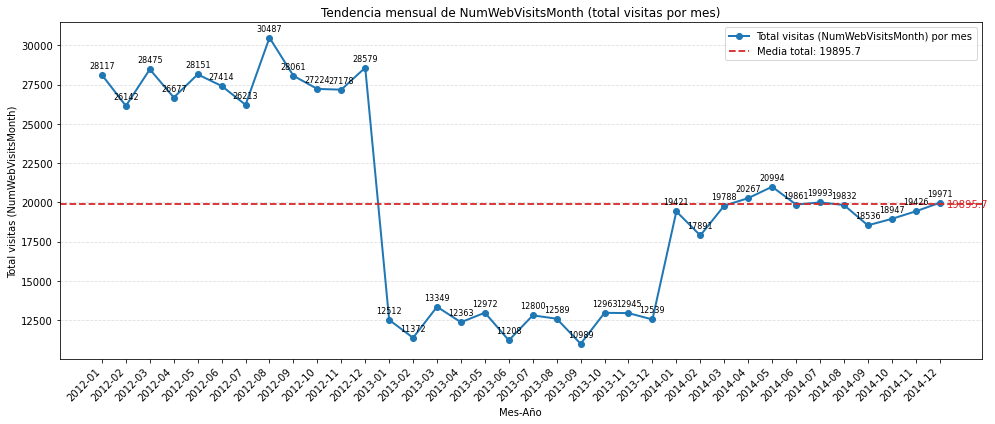

In [49]:
# Trend plot de NumWebVisitsMonth por periodo mensual (usa 'serie_mes' si existe, si no lo calcula)
try:
    data = serie_mes.copy()
except NameError:
    # calcular serie mensual desde Caracteristicas_clientes
    df_tmp = Caracteristicas_clientes.copy()
    df_tmp['periodo'] = df_tmp['Dt_Customer'].dt.to_period('M').astype(str)
    total_visitas = df_tmp.groupby('periodo')['NumWebVisitsMonth'].sum().sort_index()
    registros = df_tmp.groupby('periodo').size().sort_index()
    data = pd.DataFrame({
        'total_visitas': total_visitas,
        'registros': registros
    })
    data['media_por_cliente'] = data['total_visitas'] / data['registros']

labels = data.index.astype(str)
values = data['total_visitas'].values

# eje x como índices numéricos para anotaciones
x = range(len(labels))
media_total = values.mean()

plt.figure(figsize=(14,6))
plt.plot(x, values, marker='o', color='tab:blue', linewidth=2, label='Total visitas (NumWebVisitsMonth) por mes')
plt.axhline(media_total, color='tab:red', linestyle='--', linewidth=1.8, label=f'Media total: {media_total:.1f}')
plt.text(len(x)-1 + 0.3, media_total, f'{media_total:.1f}', color='tab:red', va='center', fontsize=10)

# Anotar cada punto con su valor
for i, v in enumerate(values):
    plt.text(i, v + max(values)*0.01, f'{int(v)}', ha='center', va='bottom', fontsize=8)

plt.xticks(ticks=list(x), labels=labels, rotation=45, ha='right')
plt.title('Tendencia mensual de NumWebVisitsMonth (total visitas por mes)')
plt.xlabel('Mes-Año')
plt.ylabel('Total visitas (NumWebVisitsMonth)')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()

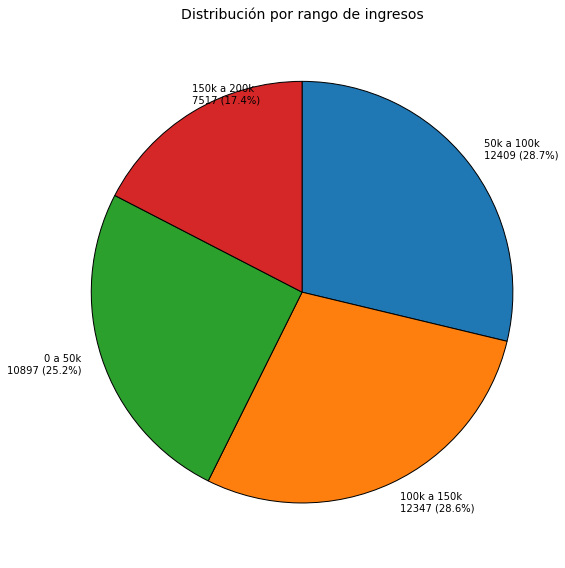

In [50]:
# Gráfico de pastel para 'rango_ingresos' usando el mismo estilo que el gráfico de 'rangos_edad'
col = 'rango_ingresos'
if col not in Caracteristicas_clientes.columns:
    raise KeyError(f"La columna '{col}' no se encuentra en el DataFrame.")

# Cálculo de conteos y porcentajes por rango de ingresos
counts = Caracteristicas_clientes[col].value_counts().sort_values(ascending=False)
total = counts.sum()
pct = counts / total * 100

# Preparar etiquetas con nombre del grupo, conteo y porcentaje
labels = [f"{grp}\n{cnt} ({p:.1f}%)" for grp, cnt, p in zip(counts.index, counts.values, pct.values)]

# Dibujar gráfico de pastel con fondo blanco y texto negro
plt.figure(figsize=(8, 8), facecolor='white')
ax = plt.gca()
ax.set_facecolor('white')

wedges, texts = plt.pie(
    counts.values,
    labels=labels,
    startangle=90,
    counterclock=False,
    wedgeprops=dict(edgecolor='black'),
    textprops={'color': 'black', 'fontsize': 10}
)

# Título
plt.title('Distribución por rango de ingresos', color='black', fontsize=14)

# Ajuste de la etiqueta del pedazo más pequeño para mejorar legibilidad (si hay más de una categoría)
if len(texts) > 1:
    idx_min = counts.values.argmin()
    try:
        x, y = texts[idx_min].get_position()
        texts[idx_min].set_position((x + 0.05, y))
        texts[idx_min].set_ha('left')
    except Exception:
        # Si no se puede mover la etiqueta, no interrumpimos la visualización
        pass

plt.axis('equal')
plt.tight_layout()
plt.show()

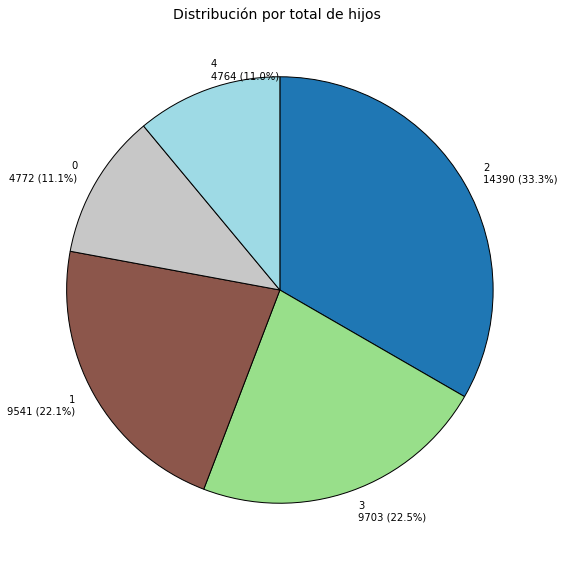

In [51]:
# Gráfico de pastel para la distribución de 'total_hijos'
col = 'total_hijos'
if col not in Caracteristicas_clientes.columns:
    raise KeyError(f"La columna '{col}' no se encuentra en el DataFrame.")

# Conteos y porcentajes
counts = Caracteristicas_clientes[col].fillna('Desconocido').value_counts().sort_values(ascending=False)
total = counts.sum()

labels = [f"{grp}\n{cnt} ({cnt/total*100:.1f}%)" for grp, cnt in zip(counts.index, counts.values)]

# Dibujar pastel
plt.figure(figsize=(8, 8), facecolor='white')
ax = plt.gca()
ax.set_facecolor('white')

colors = plt.cm.tab20(np.linspace(0, 1, len(counts)))

wedges, texts = ax.pie(
    counts.values,
    labels=labels,
    startangle=90,
    counterclock=False,
    wedgeprops=dict(edgecolor='black'),
    textprops={'color': 'black', 'fontsize': 10},
    colors=colors
)

plt.title('Distribución por total de hijos', color='black', fontsize=14)

# Ajustar posición de la etiqueta del sector más pequeño (si aplica)
if len(texts) > 0:
    idx_min = counts.values.argmin()
    try:
        x, y = texts[idx_min].get_position()
        texts[idx_min].set_position((x + 0.05, y))
        texts[idx_min].set_ha('left')
    except Exception:
        pass

plt.axis('equal')
plt.tight_layout()
plt.show()

## 2.5 Guardar el archivo con los datos limpios en el mismo path

In [52]:
import os

# Guardar Caracteristicas_clientes en Excel en el mismo directorio del archivo origen
 
# Usar la misma ruta del csv original para guardar el Excel
dir_path = os.path.dirname(csv_path)
output_filename = "Caracteristicas_clientes_limpio.xlsx"
output_path = os.path.join(dir_path, output_filename)

# Intentar guardar en Excel; si falla, guardar como CSV de respaldo
try:
    Caracteristicas_clientes.to_excel(output_path, index=False)
    print(f"Archivo guardado correctamente: {output_path}")
except Exception as e:
    print(f"Error al guardar Excel: {e}")
    csv_backup = os.path.join(destino_dir, "Caracteristicas_clientes_limpio.csv")
    try:
        Caracteristicas_clientes.to_csv(csv_backup, index=False)
        print(f"Se guardó como CSV en su lugar: {csv_backup}")
    except Exception as e2:
        print(f"Error al guardar CSV de respaldo: {e2}")

Archivo guardado correctamente: C:\Users\nicol\OneDrive - Universidad San Francisco de Quito\Escritorio\THE POWER - BOOTCAMP\DATA ANALYTICS\PROYECTOS - ENTREGAS\4. PYTHON_EDA\Manejo_de_Datos\DatosBruto\Caracteristicas_clientes_limpio.xlsx


In [53]:
print(Caracteristicas_clientes.columns)
print(Caracteristicas_clientes.shape)


Index(['Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'NumWebVisitsMonth',
       'ID', 'total_hijos', 'rango_ingresos', 'tenure_years',
       'visitas_mensuales'],
      dtype='object')
(43170, 10)


# 3. Union de datasets - Archivo Consolidado

Despues de tener ambos datasets como dataframes, limpios y con las nuevas columnas que hemso agregado, además de entender sus datos y características. Procedemos a unirlso a un archivo final para poder hacer la parte final del análisis, mostrar nuevas visualizaciones, establecer nuevas relaciones y sacar conclusiones.  

In [ ]:
# Unimos ambos datframes usando un LEFT JOIN simple entre Bank_registros (izquierda) y Caracteristicas_clientes (derecha)
# El resultado lo guardamos en un nuevo DataFrame llamado Analisis_campañas_cliente

# Referencias a los dataframes ya cargados en el notebook:
left_df = Bank_registros
right_df = Caracteristicas_clientes

# Inicializar las claves de unión
left_key = "id_"
right_key = "ID" 

if 'bank_col' in globals() and 'client_col' in globals():
    if bank_col in left_df.columns and client_col in right_df.columns:
        left_key = bank_col
        right_key = client_col

# Ejecutar el LEFT JOIN y crear el DataFrame resultado.
#   Uso de sufijos para evitar colisión de nombres de columnas comunes.
Analisis_campañas_cliente = left_df.merge(
    right_df,
    how='left',
    left_on=left_key,
    right_on=right_key,
    suffixes=('_bank', '_cliente')
)

# MMostramos deatlles del resultado
print(f"LEFT JOIN realizado usando: left_on='{left_key}'  right_on='{right_key}'")
print("Dimensiones resultado:", Analisis_campañas_cliente.shape)
Analisis_campañas_cliente.head()

LEFT JOIN realizado usando: left_on='id_'  right_on='ID'
Dimensiones resultado: (43000, 34)


,age,job,marital,education,housing,loan,contact,duration,campaign,pdays,...,Income,Kidhome,Teenhome,Dt_Customer,NumWebVisitsMonth,ID,total_hijos,rango_ingresos,tenure_years,visitas_mensuales
0,45,housemaid,MARRIED,basic.4y,0.0,0.0,telephone,261,1,999,...,161770.0,1,0,2012-04-04,29,089b39d8-e4d0-461b-87d4-814d71e0e079,1,150k a 200k,13,20 a 30 visitas
1,57,services,MARRIED,high.school,0.0,0.0,telephone,149,1,999,...,85477.0,1,1,2012-12-30,7,e9d37224-cb6f-4942-98d7-46672963d097,2,50k a 100k,12,0 a 10 visitas
2,37,services,MARRIED,high.school,1.0,0.0,telephone,226,1,999,...,147233.0,1,1,2012-02-02,5,3f9f49b5-e410-4948-bf6e-f9244f04918b,2,100k a 150k,13,0 a 10 visitas
3,40,admin.,MARRIED,basic.6y,0.0,0.0,telephone,151,1,999,...,121393.0,1,2,2012-12-21,29,9991fafb-4447-451a-8be2-b0df6098d13e,3,100k a 150k,12,20 a 30 visitas
4,56,services,MARRIED,high.school,0.0,1.0,telephone,307,1,999,...,63164.0,1,2,2012-06-20,20,eca60b76-70b6-4077-80ba-bc52e8ebb0eb,3,50k a 100k,13,20 a 30 visitas


In [ ]:
# Guardamos Analisis_campañas_cliente en Excel en el mismo directorio usado previamente (dir_path)
output_filename = "Analisis_campañas_cliente.xlsx"
output_path = os.path.join(dir_path, output_filename)

try:
    Analisis_campañas_cliente.to_excel(output_path, index=False)
    print(f"Archivo guardado correctamente: {output_path}")
except Exception as e:
    print(f"Error al guardar Excel: {e}")
    # Respaldo en CSV en el mismo directorio
    csv_backup = os.path.join(dir_path, "Analisis_campañas_cliente.csv")
    try:
        Analisis_campañas_cliente.to_csv(csv_backup, index=False)
        print(f"Se guardó como CSV en su lugar: {csv_backup}")
    except Exception as e2:
        print(f"Error al guardar CSV de respaldo: {e2}")

Archivo guardado correctamente: C:\Users\nicol\OneDrive - Universidad San Francisco de Quito\Escritorio\THE POWER - BOOTCAMP\DATA ANALYTICS\PROYECTOS - ENTREGAS\4. PYTHON_EDA\Manejo_de_Datos\DatosBruto\Analisis_campañas_cliente.xlsx


# 4. Correlaciones de datos usando nuestro Dataset consolidado

=== Correlación: age vs NumWebVisitsMonth ===


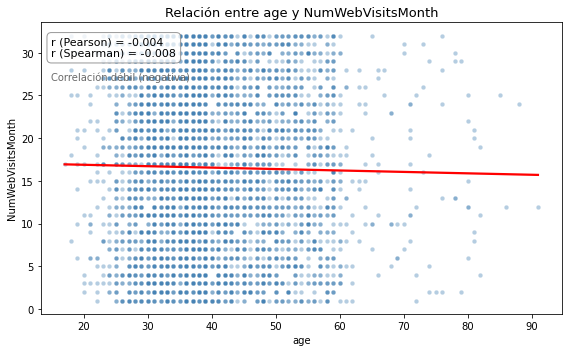

Correlación Pearson (age vs NumWebVisitsMonth): -0.004
Correlación Spearman (age vs NumWebVisitsMonth): -0.008
Interpretación: Correlación débil (negativa)

=== Correlación: total_hijos vs duracion_minutos ===


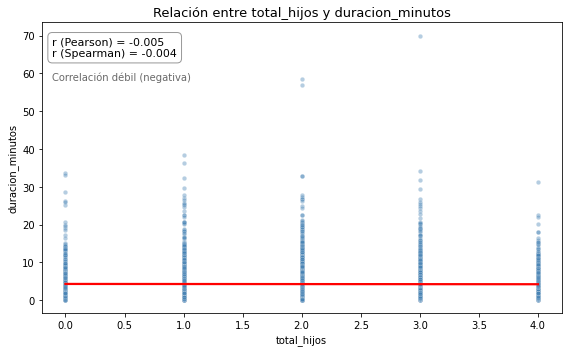

Correlación Pearson (total_hijos vs duracion_minutos): -0.005
Correlación Spearman (total_hijos vs duracion_minutos): -0.004
Interpretación: Correlación débil (negativa)

=== Correlación: Income vs campaign ===


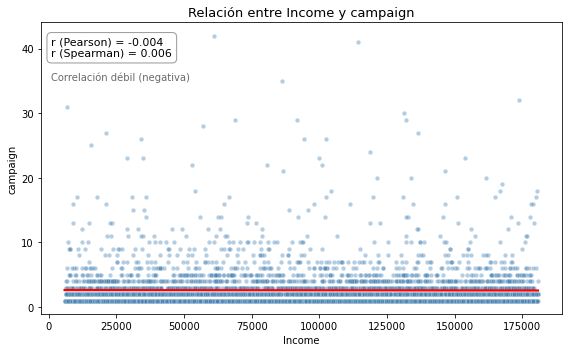

Correlación Pearson (Income vs campaign): -0.004
Correlación Spearman (Income vs campaign): 0.006
Interpretación: Correlación débil (negativa)


In [ ]:
# Usamos la función plot_correlation definida previamente para explorar 3 pares de variables.

# Preparamos DataFrame combinado
if 'Analisis_campañas_cliente' in globals():
    merged = Analisis_campañas_cliente
else:
    # left_df y right_df ya existen en el notebook; unimos por id_ <-> ID
    merged = left_df.merge(right_df, how='left', left_on='id_', right_on='ID', suffixes=('_bank', '_cliente'))

# Correlación: edad (age) vs NumWebVisitsMonth (visitas web mensuales)
#    - age: variable numérica
#    - NumWebVisitsMonth: variable numérica en el dataset de clientes
print("=== Correlación: age vs NumWebVisitsMonth ===")
if {'age', 'NumWebVisitsMonth'}.issubset(merged.columns):
    plot_correlation(merged, 'age', 'NumWebVisitsMonth')
else:
    print("Columnas faltantes para age vs NumWebVisitsMonth:", set(['age','NumWebVisitsMonth']) - set(merged.columns))

# Correlación: total_hijos vs duracion_minutos
#    - total_hijos: número de hijos del cliente (clientes)
#    - duracion_minutos: duración de la llamada en minutos (campaña)
print("\n=== Correlación: total_hijos vs duracion_minutos ===")
if {'total_hijos', 'duracion_minutos'}.issubset(merged.columns):
    plot_correlation(merged, 'total_hijos', 'duracion_minutos')
else:
    print("Columnas faltantes para total_hijos vs duracion_minutos:", set(['total_hijos','duracion_minutos']) - set(merged.columns))

# Correlación: Income vs campaign
#    - Income: ingreso del cliente (numérico)
#    - campaign: número de contactos realizados en la campaña (numérico)
print("\n=== Correlación: Income vs campaign ===")
if {'Income', 'campaign'}.issubset(merged.columns):
    plot_correlation(merged, 'Income', 'campaign')
else:
    print("Columnas faltantes para Income vs campaign:", set(['Income','campaign']) - set(merged.columns))


Número de variables numéricas: 19
Variables numéricas: ['age', 'housing', 'loan', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'duracion_minutos', 'Income', 'Kidhome', 'Teenhome', 'NumWebVisitsMonth', 'total_hijos', 'tenure_years']


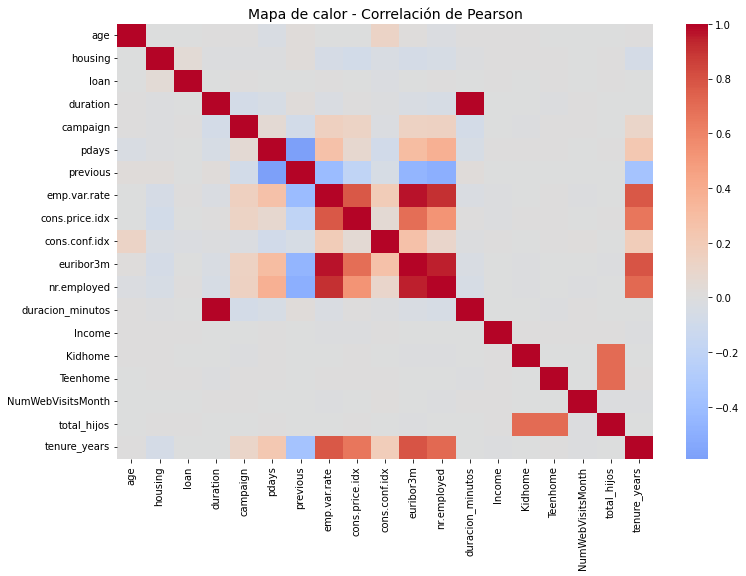

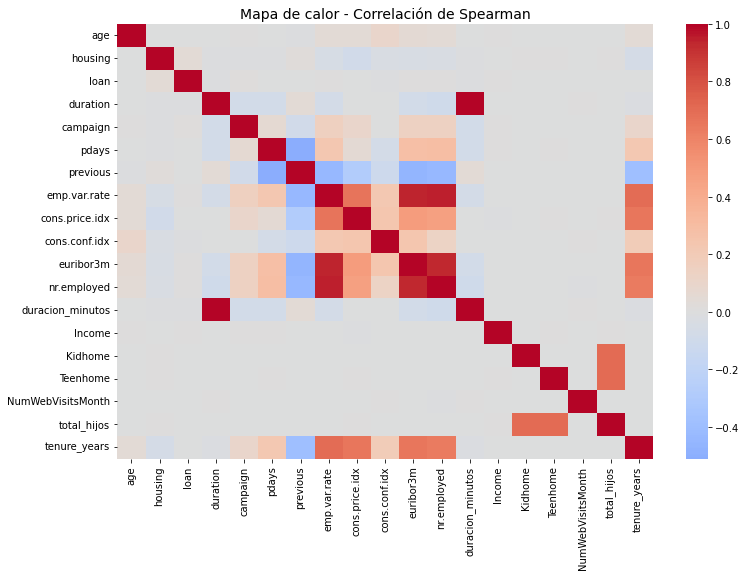

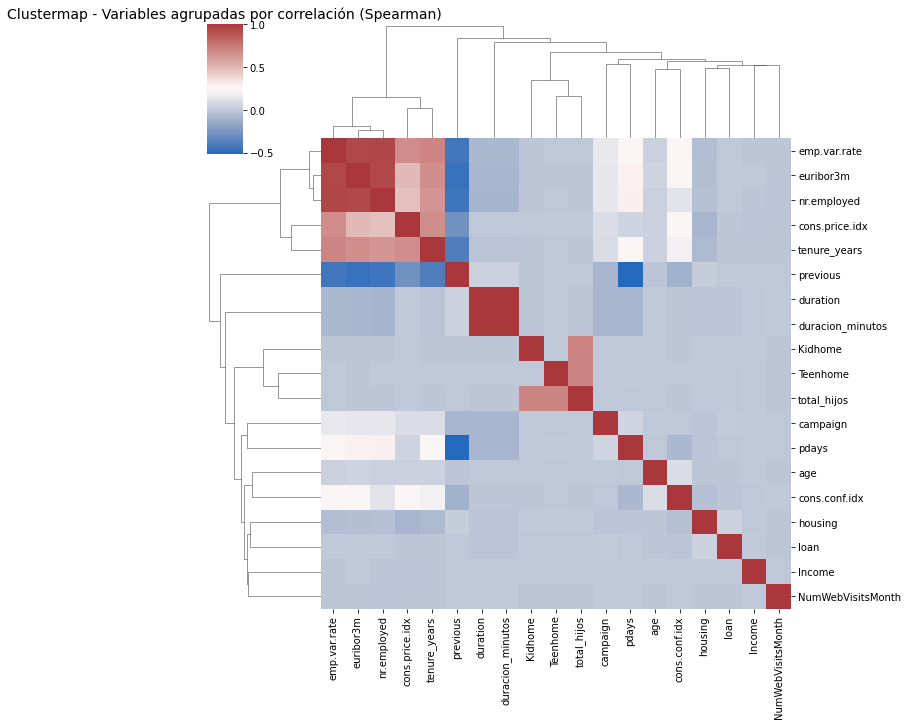

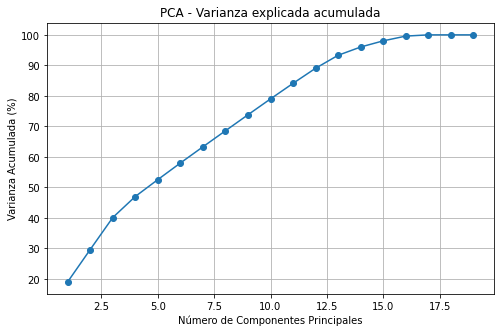


🔹 Carga de variables en los primeros 3 componentes principales:
                        PC1       PC2       PC3
age                0.002492  0.006465  0.002940
housing            0.040291 -0.020196 -0.005336
loan               0.001064 -0.004351  0.001226
duration           0.043494  0.570332  0.408577
campaign          -0.102652 -0.063404 -0.052676
pdays             -0.258270 -0.027537 -0.008654
previous           0.335159 -0.003106 -0.012058
emp.var.rate      -0.480606  0.032977  0.024033
cons.price.idx    -0.032091  0.005416 -0.003479
cons.conf.idx     -0.105763  0.018918  0.011298
euribor3m         -0.378932  0.029040  0.022366
nr.employed       -0.483815  0.020421  0.012803
duracion_minutos   0.043465  0.570348  0.408565
Income             0.003353 -0.008285  0.003755
Kidhome            0.003687 -0.288094  0.408312
Teenhome          -0.000435 -0.293967  0.404155
NumWebVisitsMonth  0.004082  0.004783 -0.006977
total_hijos        0.002301 -0.411858  0.574889
tenure_years      -0.42

In [ ]:
# Análisis de correlaciones y PCA en Analisis_campañas_cliente
# Importar librerías necesarias
from sklearn.preprocessing import StandardScaler  # ✅ Import corregido
from sklearn.decomposition import PCA

# Primero, seleccionamos solo las variables numéricas para el análisis
# Filtramos solo columnas numéricas (evitamos categóricas)
numeric_df = Analisis_campañas_cliente.select_dtypes(include=[np.number])

print("\nNúmero de variables numéricas:", len(numeric_df.columns))
print("Variables numéricas:", numeric_df.columns.tolist())

# Calculamos matrices de correlación

# Correlación de Pearson (relaciones lineales)
corr_pearson = numeric_df.corr(method='pearson')

# Correlación de Spearman (relaciones no lineales / ordinales)
corr_spearman = numeric_df.corr(method='spearman')

# Esta vez viaulizamos las correlaciones con mapas de calor
plt.figure(figsize=(12, 8))
sns.heatmap(corr_pearson, cmap='coolwarm', center=0, annot=False)
plt.title("Mapa de calor - Correlación de Pearson", fontsize=14)
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_spearman, cmap='coolwarm', center=0, annot=False)
plt.title("Mapa de calor - Correlación de Spearman", fontsize=14)
plt.show()

# Clustering de variables correlacionadas (agrupaciones visuales)
sns.clustermap(corr_spearman, cmap='vlag', figsize=(10, 10), annot=False)
plt.title("Clustermap - Variables agrupadas por correlación (Spearman)", fontsize=14)
plt.show()

# Ahora aplicamos un Análisis de Componentes Principales (PCA)

# Escalamos las variables para darles igual peso
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df.fillna(0))  # Rellenamos NaN si hay

# Aplicamos PCA
pca = PCA()
pca_data = pca.fit_transform(scaled_data)

# Varianza explicada por componente
explained_variance = np.cumsum(pca.explained_variance_ratio_) * 100

plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Acumulada (%)')
plt.title('PCA - Varianza explicada acumulada')
plt.grid(True)
plt.show()

# Mostrar importancia de variables en los primeros componentes
pca_components = pd.DataFrame(
    pca.components_,
    columns=numeric_df.columns,
    index=[f'PC{i+1}' for i in range(len(numeric_df.columns))]
)

print("\n🔹 Carga de variables en los primeros 3 componentes principales:")
print(pca_components.head(3).T)



# 5. Analisis Avanzado - Aplicación de Modelo predictivo:**

Para finalizar nuestor proyecto y tene run informe más robusto, vamos a construir un modelo de regresión logística con variables limpias y escaladas. Con este, buscaremos predecir la probabilidad de que un cliente suscriba el producto (y), usando estas variables:

- duration → duración del contacto en segundos

- previous → número de contactos anteriores

- tenure_years → antigüedad del cliente (asumo que ya la tienes calculada)

- emp.var.rate → tasa de variación del empleo

- euribor3m → tipo de interés a 3 meses

El modelo preferido es una regresión logística, pues es simple y fácil de explicar para este proyecto. Nos mostrará directamente el peso e influencia de cada variable sobre la probabilidad de éxito (y = 1).


Tamaño del conjunto de entrenamiento: (23620, 5)
Tamaño del conjunto de prueba: (10124, 5)

📊 MÉTRICAS DEL MODELO:
Accuracy : 0.895
Precision: 0.589
Recall   : 0.249
F1 Score : 0.350
ROC AUC  : 0.902


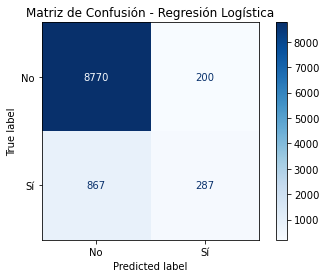

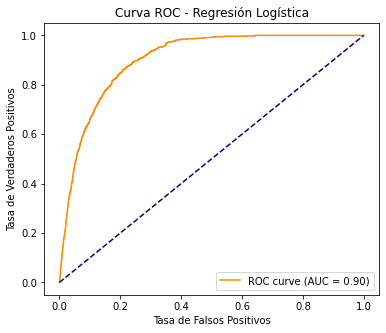


🔍 COEFICIENTES DEL MODELO:
       Variable  Coeficiente  Importancia (exp(coef))
0      duration     1.189268                 3.284677
1      previous     0.203933                 1.226217
2  tenure_years     0.151234                 1.163269
3  emp.var.rate    -0.396653                 0.672567
4     euribor3m    -0.844859                 0.429618


"\n🧩 Interpretación de resultados:\n- Las métricas (accuracy, recall, F1, AUC) resumen el rendimiento del modelo.\n- Un coeficiente positivo implica que al aumentar esa variable, aumenta la probabilidad de que el cliente diga 'Sí'.\n- Un coeficiente negativo indica el efecto contrario (reduce la probabilidad de suscripción).\n\nEjemplo típico:\n- 'duration' suele tener el mayor peso positivo → llamadas más largas se asocian con mayor conversión.\n- 'euribor3m' y 'emp.var.rate' suelen ser negativos → condiciones económicas más duras reducen la tasa de éxito.\n\nEste modelo permite identificar las variables con mayor influencia en la decisión del cliente y optimizar estrategias de contacto.\n"

In [ ]:
# Importamos librerías
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, ConfusionMatrixDisplay, roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

# Preparación de los datos para el modelo de regresión logística
# Selección de variables predictoras y variable objetivo
features = ['duration', 'previous', 'tenure_years', 'emp.var.rate', 'euribor3m']
target = 'y'

# Hacemos una copia del datframe para evitar cualqueir cambio no deseado
df_modelo = Analisis_campañas_cliente.copy()

# Convertir 'y' a binaria (1=Sí, 0=No)
df_modelo[target] = df_modelo[target].map({'yes': 1, 'no': 0, 'Sí': 1, 'No': 0}).astype(int)

# Eliminamos filas con valores nulos en las variables relevantes
df_modelo = df_modelo.dropna(subset=features + [target])

# Separamos variables predictoras y objetivo
X = df_modelo[features]
y = df_modelo[target]

# Dividimos los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)

# Escalamos las variables numéricas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenamos el modelo de regresión logística
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# Evaluamos el modelo
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

print("\n📊 MÉTRICAS DEL MODELO:")
print(f"Accuracy : {accuracy_score(y_test, y_pred):.3f}")
print(f"Precision: {precision_score(y_test, y_pred):.3f}")
print(f"Recall   : {recall_score(y_test, y_pred):.3f}")
print(f"F1 Score : {f1_score(y_test, y_pred):.3f}")
print(f"ROC AUC  : {roc_auc_score(y_test, y_prob):.3f}")

# Creamos la Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Sí'])
disp.plot(cmap='Blues')
plt.title("Matriz de Confusión - Regresión Logística")
plt.show()

# Creamos la Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc_score(y_test, y_prob):.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - Regresión Logística')
plt.legend(loc="lower right")
plt.show()

# Mostramos los Coeficientes del modelo
coeficientes = pd.DataFrame({
    'Variable': features,
    'Coeficiente': model.coef_[0],
    'Importancia (exp(coef))': np.exp(model.coef_[0])
}).sort_values(by='Coeficiente', ascending=False)

print("\n🔍 COEFICIENTES DEL MODELO:")
print(coeficientes)



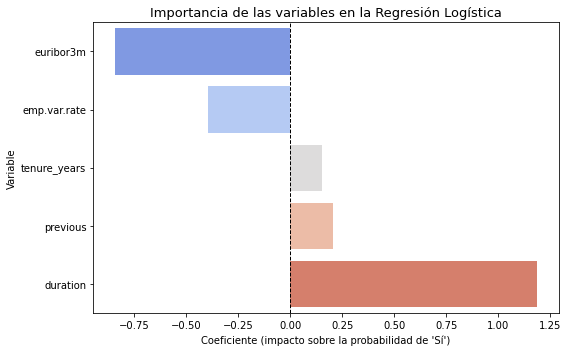

In [ ]:
# Por último, creamos una visualización que nos permite ver la Importancia de las variables

# Ordenar los coeficientes de mayor a menor
coef_plot = coeficientes.sort_values(by='Coeficiente', ascending=True)

plt.figure(figsize=(8, 5))
sns.barplot(
    data=coef_plot,
    x='Coeficiente',
    y='Variable',
    palette='coolwarm'
)
plt.title("Importancia de las variables en la Regresión Logística", fontsize=13)
plt.xlabel("Coeficiente (impacto sobre la probabilidad de 'Sí')")
plt.ylabel("Variable")
plt.axvline(0, color='black', linestyle='--', linewidth=1)
plt.tight_layout()
plt.show()
